In [1]:
'''
Date: 24/Jan/2022
Auther: Yike Xie
Content: Figure 5 in dengue paper
'''

'\nDate: 24/Jan/2022\nAuther: Yike Xie\nContent: Figure 5 in dengue paper\n'

In [2]:
import os

import numpy as np
import pandas as pd

import anndata
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns

from collections import defaultdict
import random
import itertools
from numpy import *    

In [3]:
import sys
sys.path.append('/home/yike/phd/dengue/dengue_children/paper_figures/final/modules') 
import YK_util, optimized_pair_comparison, functions_CCC_figure_fra_pair
from YK_util import *
from optimized_pair_comparison import *
from functions_CCC_figure_fra_pair import *

In [4]:
# load data
path = '/home/yike/phd/dengue/data/mergedata_20211001.h5ad'
adata = sc.read_h5ad(path)
adata_kid = subsetdata(adata)
adata_kid = normalizedata(adata_kid, log1p=True) # log1p = 2
adata_kid = removegenes(adata_kid)
adata_kid = adata_kid[(adata_kid.obs.cell_subtype_new != 'doublets') & 
                        (adata_kid.obs.cell_subtype_new != 'unknown')].copy()

sc.pp.filter_genes(adata_kid, min_cells=3)

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [5]:
#rename and reorder some celltypes 
adata_kid = adata_kid.copy()
reorg_celltype(adata_kid) # 'cell_type_new', 'cell_subtype_new'

/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:110: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata.obs.cell_type_new.cat.add_categories(['T cells', 'NK cells', 'B cells'], inplace = True)
/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:120: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata.obs.cell_type_new.cat.remove_categories(['NK/T_cells', 'B_cells'], inplace = True)
/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:125: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories 

In [6]:
#save path
save_figures = '/home/yike/phd/dengue/docs/paper_draft/figures/figure_5/'
save_tables = '/home/yike/phd/dengue/docs/paper_draft/tabels/'

In [7]:
# get cell types and cell subtypes
cell_types = adata_kid.obs['cell_type_new'].unique().tolist()
cell_subtypes = adata_kid.obs['cell_subtype_new'].unique().tolist()

In [8]:
# load cell type palette
ct_palette = load_ct_palette()
print([ct for ct in ct_palette.keys()])
sns.color_palette(ct_palette.values())

['B cells', 'Plasmablasts', 'T cells', 'NK cells', 'Monocytes', 'conventional DCs', 'plasmacytoid DCs', 'megakaryocytes']


[(0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [9]:
# load cell subtype palette
cst_palette = load_cst_palette()
print([cst for cst in cst_palette.keys()])
sns.color_palette(cst_palette.values())

['memory B cells', 'naive B cells', 'activated B cells', 'proliferating plasmablasts', 'non-proliferating plasmablasts', 'CD4+ T cells', 'CD8+ effector T cells', 'CD8+ naive/memory T cells', 'signaling NK cells', 'cytotoxic NK cells', 'classical monocytes', 'non-classical monocytes', 'intermediate monocytes', 'conventional DCs', 'plasmacytoid DCs', 'megakaryocytes']


[(1.0, 0.0, 0.0),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5019607843137255, 0.0, 0.0),
 (1.0, 0.8941176470588236, 0.7686274509803922),
 (1.0, 0.5490196078431373, 0.0),
 (0.6901960784313725, 0.7686274509803922, 0.8705882352941177),
 (0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
 (0.0, 0.0, 0.5019607843137255),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (0.5607843137254902, 0.7372549019607844, 0.5607843137254902),
 (0.5647058823529412, 0.9333333333333333, 0.5647058823529412),
 (0.0, 0.5019607843137255, 0.0),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [10]:
def heatmap_cst(cst_pair, g_list, cst_order, vs_type='SD vs D', save_fd=False, cbar_lim=3.5):
    #rcParams['figure.figsize']=(7, 14)
    rcParams['font.size']=18
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    rcParams['figure.dpi'] = 300
    
    
    df = cst_pair.reset_index().set_index('gene').loc[g_list][['cell_subtype', 'med_pair']]

    df_new = pd.DataFrame(np.zeros([len(df.index.unique()), len(cst_order)]), columns=cst_order, index=g_list)

    for idx in df_new.index:    
        for col in df_new.columns:
            df_new.at[idx, col] = df.loc[idx][df.loc[idx]['cell_subtype'] == col]['med_pair'][0]
            
    df_new = pd.DataFrame(np.clip(df_new.values, -cbar_lim, cbar_lim), columns=df_new.columns, index=df_new.index)
    
    fig, ax = plt.subplots(figsize=[1 + 1.5 * len(cst_order), 0.5 * len(g_list)])
    cmap = sns.diverging_palette(245, 5, as_cmap=True)
    
    ax = sns.heatmap(df_new, cmap=cmap, center=0, yticklabels=True, vmin=-cbar_lim, vmax=cbar_lim,
                     cbar_kws={'label': 'log2 fold change\n(%s)'%vs_type, 'shrink': .3})
    ax.set_ylabel(None)
    
    xlabels = [label.get_text().replace('_', ' ') for label in ax.get_xticklabels()]
    ax.set_xticklabels(xlabels)

    if save_fd is not False:
        fig.savefig(save_figures + save_fd, bbox_inches='tight')

    return {'figure': fig, 'ax': ax}

def pairwise_boxplot(FCs_data, cell_subtype, genes, xlim=12, path=False):
    
    rcParams['font.size']=18
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    rcParams['figure.dpi'] = 300
    
    box_data = FCs_data.loc[cell_subtype][genes]
    
    cmap = mpl.cm.get_cmap('coolwarm')
    norm = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
    palette = [cmap(norm(x)) for x in np.clip(box_data.median(axis=0), -2.5, 2.5)]
    
    box_data = pd.melt(box_data)
    
    fig, ax = plt.subplots(figsize=(6, len(genes)*0.35 + 1))
    sns.boxplot(data = box_data, y = 'variable', x = 'value', palette = palette, width=0.8,
                orient = 'h', linewidth=1, ax=ax)
    
    ax.set(ylabel = None, xlim = (-xlim, xlim))
    ax.set_yticklabels(genes)
    
    ax.set_xlabel('log2 fold change')
    
    ax_cb = fig.add_axes([0.25, 0, 0.5, 0.02])
    cbar = mpl.colorbar.ColorbarBase(ax_cb, norm=norm, cmap=cmap, orientation='horizontal')
    cbar.set_ticks([-2, -1, 0, 1, 2])
    cbar.set_ticklabels(['-2', '-1', '0', '1', '2'])
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label('log2 fold change', fontsize=15)

    for x in [-1, 0, 1]:
        ax.axvline(x, c='black', ls='-.', lw=0.5, zorder=0.5)
    
    if path is not False:
        fig.savefig(save_figures + path, bbox_inches='tight')
        
    return {'figure': fig, 'ax': ax}

def annanote_adult(adata_adult): 
    adata_adult.obs['cell_type_new'] = adata_adult.obs['cell_type']
    adata_adult.obs['cell_type_new'] = adata_adult.obs['cell_type_new'].astype('object')
    adata_adult.obs['cell_subtype_new'] = adata_adult.obs['cell_subtype_new'].astype('object')
    
    adata_adult.obs.loc[adata_adult.obs['cell_type_new'] == 'NK_cells', 'cell_type_new'] = 'NK cells'
    adata_adult.obs.loc[adata_adult.obs['cell_type_new'] == 'B_cells', 'cell_type_new'] = 'B cells'
    adata_adult.obs.loc[adata_adult.obs['cell_type_new'] == 'T_cells', 'cell_type_new'] = 'T cells'
    ####################################
    
    for gene in ['GZMA',  'NKG7', 'GNLY', 'XCL1', 'XCL2', 'FCGR3A', 'CCND2', 'MKI67']:
            adata_adult.obs[gene] = (adata_adult[:, gene].X.toarray() > 0)
    
    ####################  
    adata_adult.obs.loc[adata_adult.obs['cell_type_new'] == 'NK cells', 'cell_type_new'] = 'NK_unknown'
    idx_NK = ((adata_adult.obs['cell_type_new'] == 'NK_unknown') &
             (adata_adult.obs['GZMA'] == True) &
             (adata_adult.obs['NKG7'] == True) &
             (adata_adult.obs['GNLY'] == True) )
    adata_adult.obs.loc[idx_NK, 'cell_type_new'] = 'NK cells'
    
    adata_adult.obs.loc[adata_adult.obs['cell_type_new'] == 'NK cells', 'cell_subtype_new'] = 'cytotoxic NK cells'
    idx_sig_NK = ((adata_adult.obs['cell_type_new'] == 'NK cells') & 
                        (adata_adult.obs['XCL1'] == True) & 
                        (adata_adult.obs['XCL2'] == True) &
                        (adata_adult.obs['FCGR3A'] == True))
    adata_adult.obs.loc[idx_sig_NK, 'cell_subtype_new'] = 'signaling NK cells'
    
    ####################
    adata_adult.obs.loc[adata_adult.obs['cell_type_new'] == 'Plasmablasts', 'cell_subtype_new'] = 'non-proliferating plasmablasts'
    idx_P = ((adata_adult.obs['cell_type_new'] == 'Plasmablasts') & 
                        (adata_adult.obs['CCND2'] == True) & 
                        (adata_adult.obs['MKI67'] == True))
    adata_adult.obs.loc[idx_P, 
                        'cell_subtype_new'] = 'proliferating plasmablasts'
    
    ####################
    adata_adult.obs['cell_type_new'] = adata_adult.obs['cell_type_new'].astype('category')
    adata_adult.obs['cell_subtype_new'] = adata_adult.obs['cell_subtype_new'].astype('category')    
    return adata_adult

def pair_comparison(adata, ct_obs, cell_types, gene_cut_off, cell_cut_off, log1p=False):    
    import random
    ress = pd.DataFrame([])
    log2FC = pd.DataFrame([])
    
    cds = ['dengue', 'S_dengue']
    
    for cell_type in cell_types:
        adata_ct = adata[adata.obs[ct_obs] == cell_type]
        
        ####### filter out genes expressed less than gene_cut_off in all patients
        IDs = list(adata_ct.obs['ID'].unique())
        fra = [np.asarray((adata_ct[adata_ct.obs['ID'] == ID].X > 0).mean(axis=0))[0] for ID in IDs]
        fra=pd.DataFrame(fra, index=IDs, columns=adata_ct.var_names).T
        gene_list = fra.index.tolist()
        
        if gene_cut_off is not False:
            for idx, row in fra.iterrows():
                n = 0
                for i in row.tolist():
                    if i <= gene_cut_off:
                        n += 1
                if n == len(IDs):
                    gene_list.remove(idx)
        
        adata_ct = adata_ct[:, gene_list]
        
        ####### filter out patient with less than 5 cells for the cell type
        if ct_obs == 'cell_type_new':
            ct = cell_type
        elif ct_obs == 'cell_subtype_new':
            ct = adata_ct.obs['cell_type_new'].unique()[0]
        
        for ID in IDs:
            if adata[(adata.obs['cell_type_new'] == ct) & (adata.obs['ID'] == ID)].obs.shape[0] < cell_cut_off:
                IDs.remove(ID)
        adata_ct = adata_ct[adata_ct.obs['ID'].isin(IDs)]
        
        adata_S_ct = adata_ct[adata_ct.obs['Condition'] == cds[1]]
        adata_NS_ct = adata_ct[adata_ct.obs['Condition'] == cds[0]]
        
        IDs_S = list(adata_S_ct.obs['ID'].unique())
        IDs_NS = list(adata_NS_ct.obs['ID'].unique())
                
        ####### pair comparison
        log2_fc = []
        for ID_S in IDs_S:
            adata_S_ID = adata_S_ct[adata_S_ct.obs['ID'] == ID_S]
            
            for ID_NS in IDs_NS:
                adata_NS_ID = adata_NS_ct[adata_NS_ct.obs['ID'] == ID_NS]

                X_S = adata_S_ID.X
                X_NS = adata_NS_ID.X
                avg_S = np.asarray(X_S.mean(axis=0))[0]
                avg_NS = np.asarray(X_NS.mean(axis=0))[0]

                if log1p is False:
                    log2_fc.append(np.log2(avg_S + 1) - np.log2(avg_NS + 1))
                elif log1p not in (True, 2):
                    log2_fc.append((avg_S - avg_NS) / np.log2(log1p))
                else:
                    log2_fc.append(avg_S - avg_NS)

        log2_fc = np.asarray(log2_fc)
        
        if log2_fc.size == 0:
            continue
        med_pair = np.median(log2_fc, axis=0)
        fra_pair = [len(log2_fc[:, i][log2_fc[:, i] > 0])/log2_fc.shape[0] for i in range(log2_fc.shape[1])]
        neg_fra_pair = [len(log2_fc[:, i][log2_fc[:, i] < 0])/log2_fc.shape[0] for i in range(log2_fc.shape[1])]

        res = pd.DataFrame([], index=adata_ct.var_names)
        res['med_pair'] = med_pair
        res['fra_pair'] = fra_pair
        res['neg_fra_pair'] = neg_fra_pair
        res['cell_subtype'] = cell_type
        ress = pd.concat([ress, res], join='outer')
        ress['gene'] = ress.index.tolist()

        FCs = pd.DataFrame(log2_fc, columns = adata_ct.var_names, index=[cell_type] * log2_fc.shape[0])
        log2FC = pd.concat([log2FC, FCs], join='outer')
        
    return {'pair_res': ress, 'log_FCs': log2FC}

In [26]:
adata_adult = subsetdata(adata, platform ='plate')
adata_adult = normalizedata(adata_adult)
adata_adult = removegenes(adata_adult)
adata_adult = annanote_adult(adata_adult)

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categor

In [11]:
ct_pair = pd.read_csv(save_tables + 'ct_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
ct_log2FC = pd.read_csv(save_tables + 'ct_log2FC.tsv', sep='\t', index_col=0)

cst_pair = pd.read_csv(save_tables + 'cst_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
cst_log2FC = pd.read_csv(save_tables + 'cst_log2FC.tsv', sep='\t', index_col=0)


cst_pair_a = pd.read_csv(save_tables + 'adult_cst_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
cst_log2FC_a = pd.read_csv(save_tables + 'adult_cst_log2FC.tsv', sep='\t', index_col=0)

ct_pair_a = pd.read_csv(save_tables + 'adult_ct_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
ct_log2FC_a = pd.read_csv(save_tables + 'adult_ct_log2FC.tsv', sep='\t', index_col=0)

In [6]:
ct_NK = ct_pair.loc['NK cells']

In [7]:
genes_ks = ct_NK[((ct_NK['log2_fold_change'] >= 1) | (ct_NK['log2_fold_change'] <= -1))
      & (ct_NK['pvalue_corrected'] <= 0.05)]

In [8]:
genes_pair = ct_NK[(ct_NK['med_pair'] >= 1)
      | (ct_NK['med_pair'] <= -1)]

In [9]:
genes_pair.shape

(57, 11)

In [10]:
len(np.intersect1d(genes_ks.index, genes_pair.index))

46

# NK cells

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


{'figure': <Figure size 1800x2400 with 2 Axes>,
 'ax': <AxesSubplot:xlabel='log2 fold change'>}

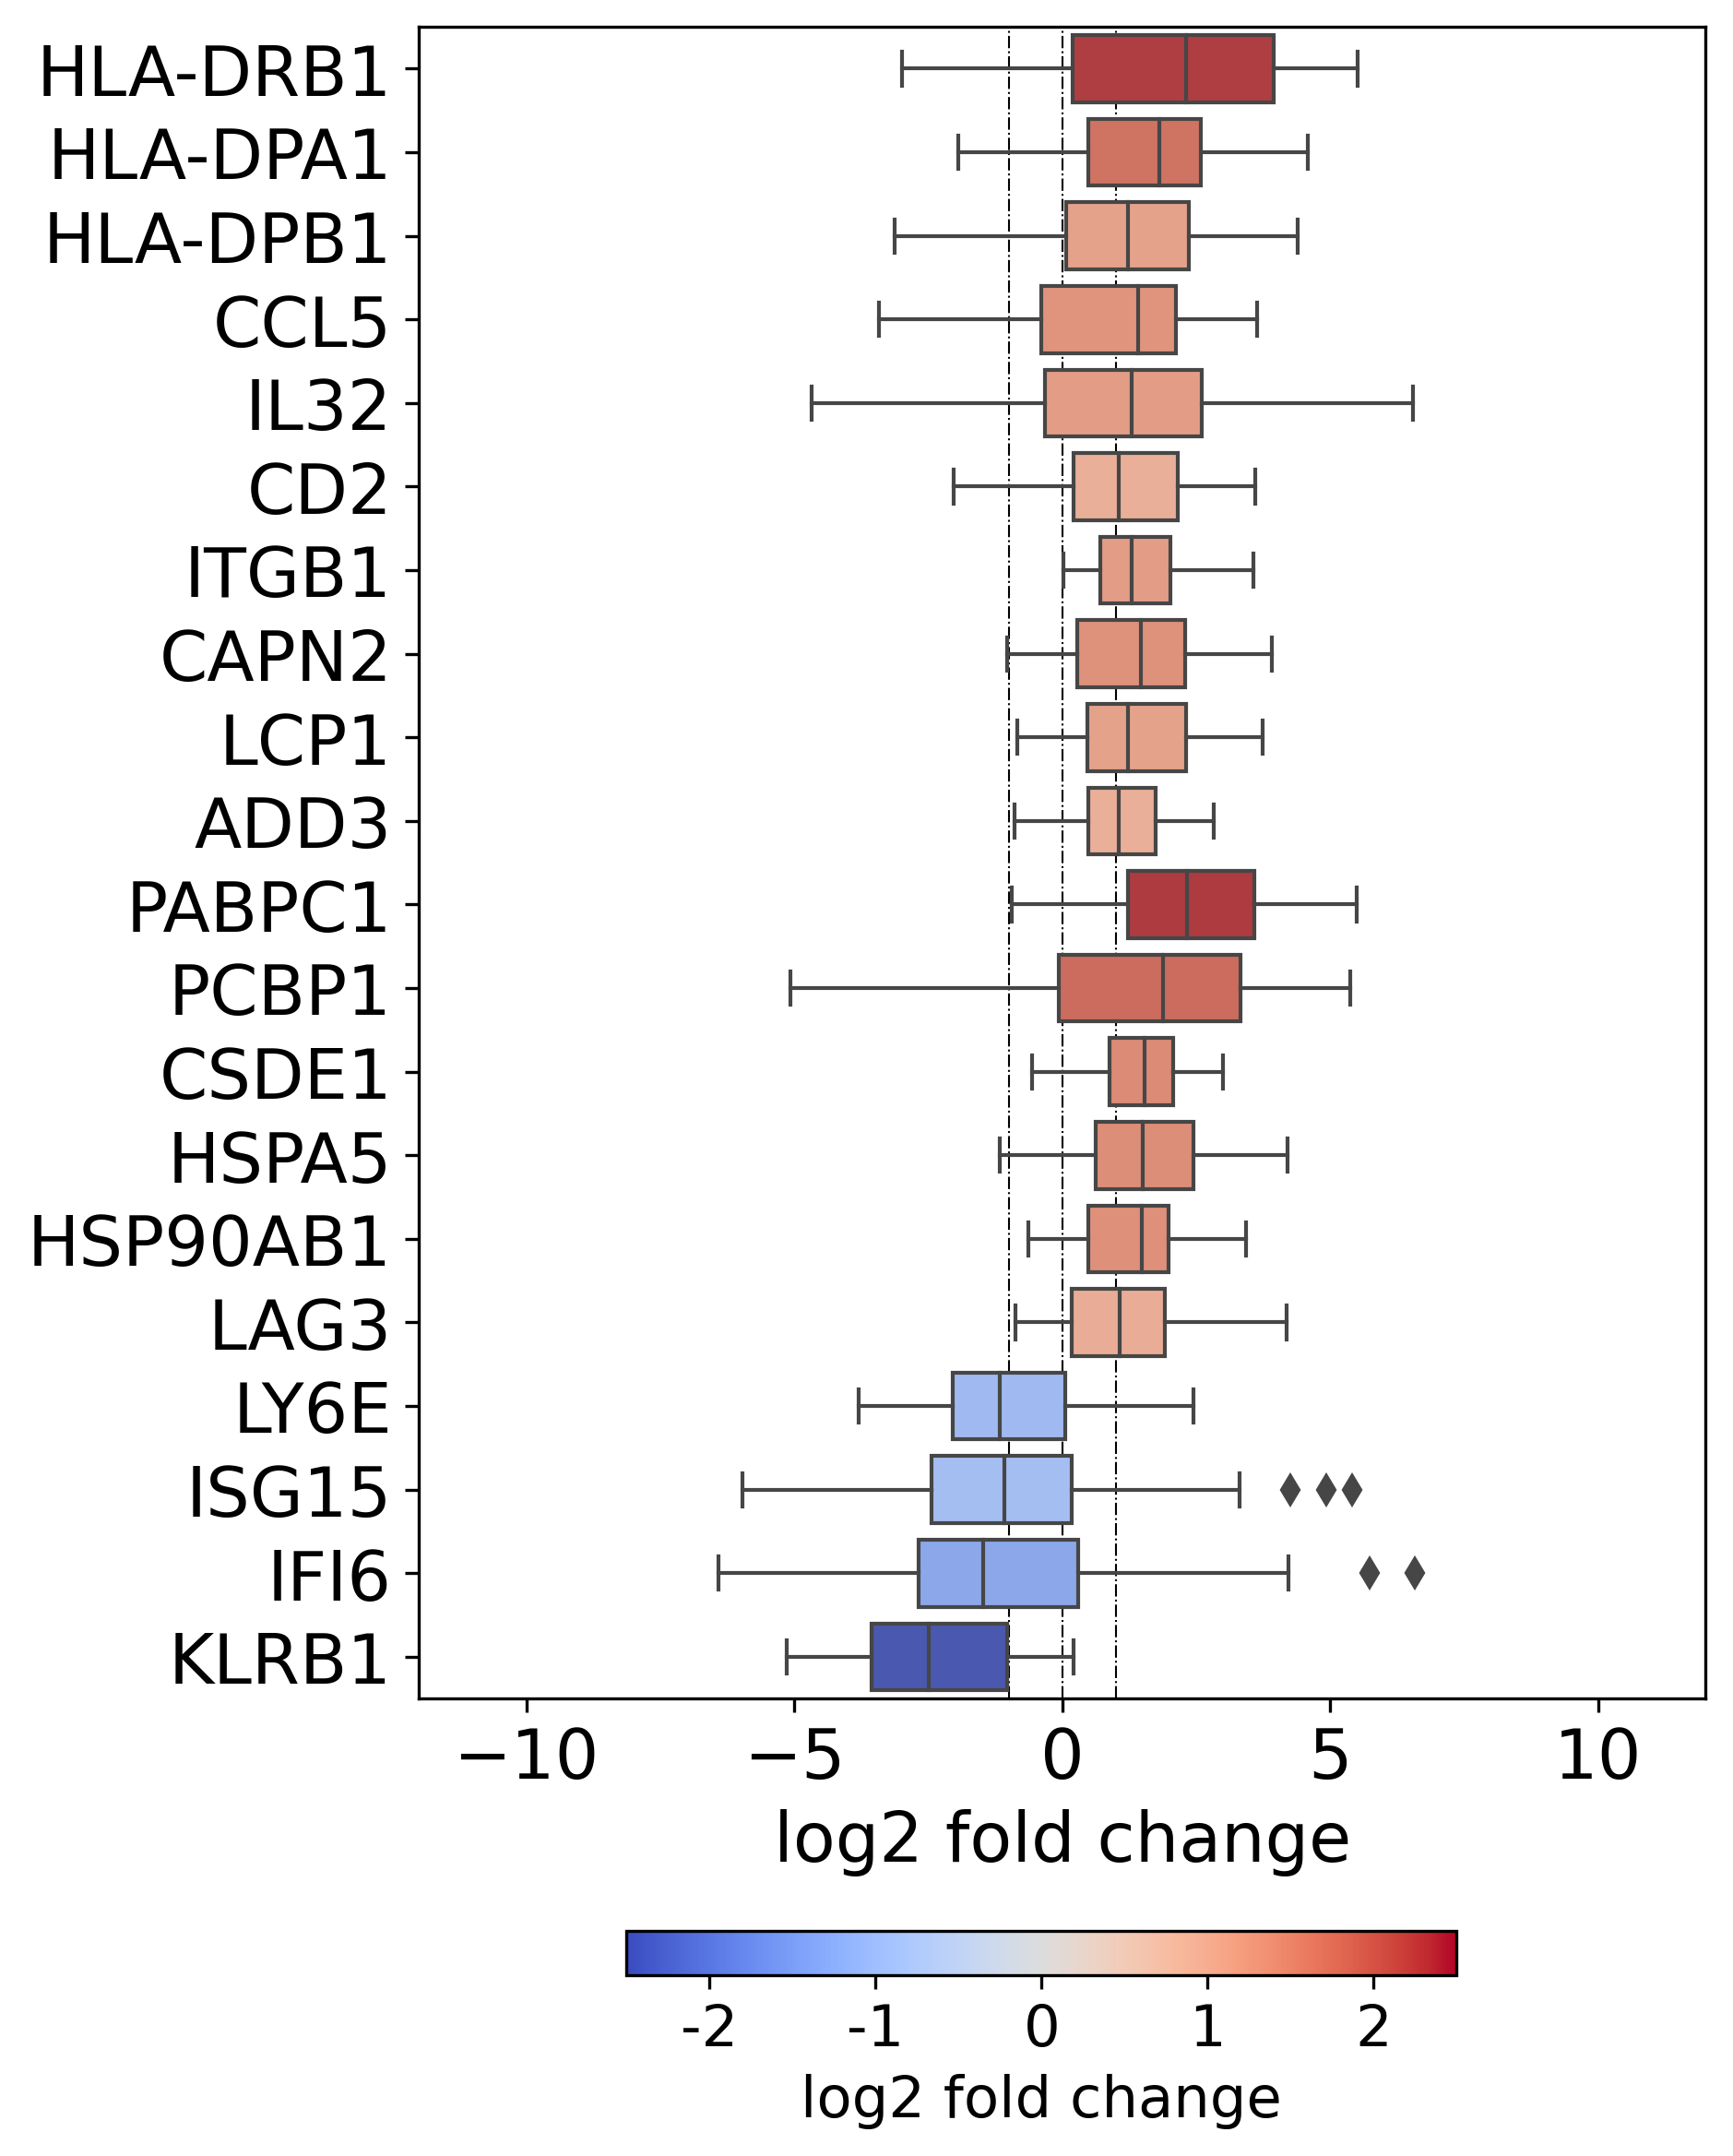

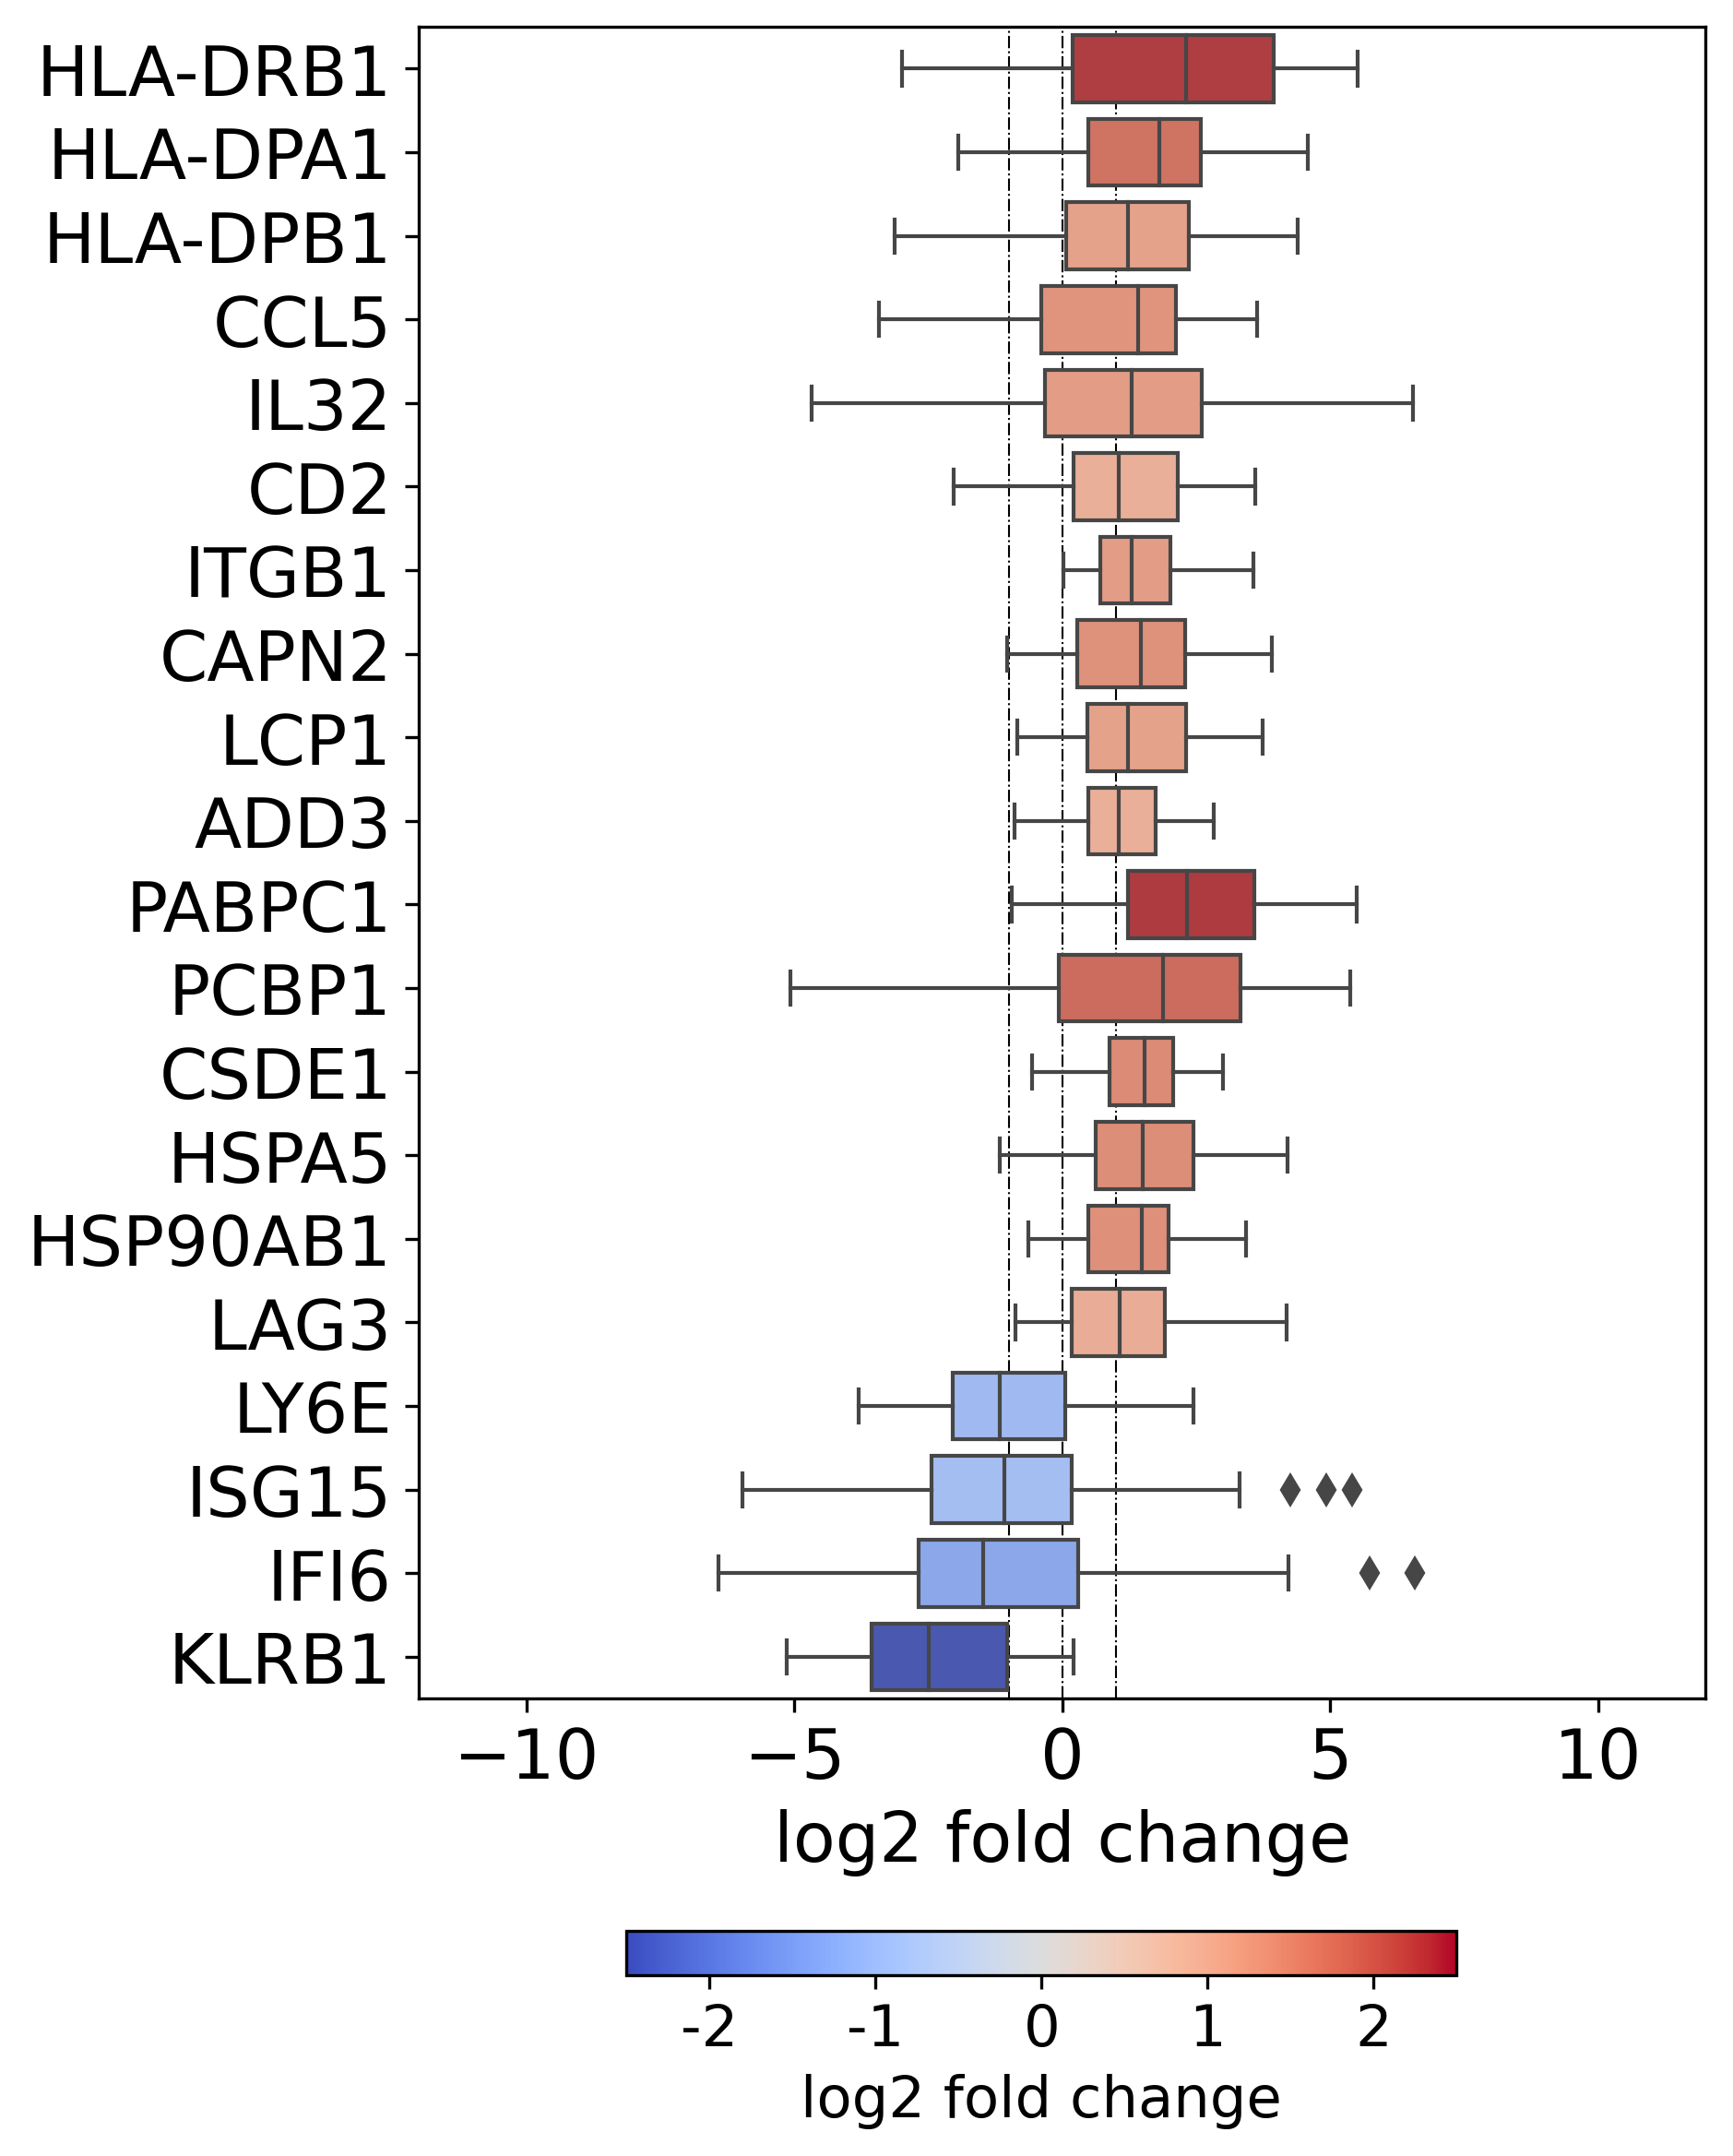

In [12]:
# panel A
NK_genes = [
    'HLA-DRB1', 'HLA-DPA1', 'HLA-DPB1',  'CCL5', 'IL32','CD2','ITGB1',  # NK activation
    'CAPN2','LCP1', 'ADD3', # cytoskeleton
    'PABPC1', 'PCBP1', 'CSDE1', 'HSPA5', 'HSP90AB1', # translation
    'LAG3', # immunosuppression
    'LY6E', 'ISG15', 'IFI6', # ISG
     #'XCL1', 'CCL4', # cytokines 
    'KLRB1', # Cytotoxity inhibition 
]

pairwise_boxplot(ct_log2FC, ['NK cells'], NK_genes, path='box_NK_genes.pdf')
pairwise_boxplot(ct_log2FC, ['NK cells'], NK_genes, path='box_NK_genes.png')

{'figure': <Figure size 1200x4350 with 2 Axes>, 'ax': <AxesSubplot:>}

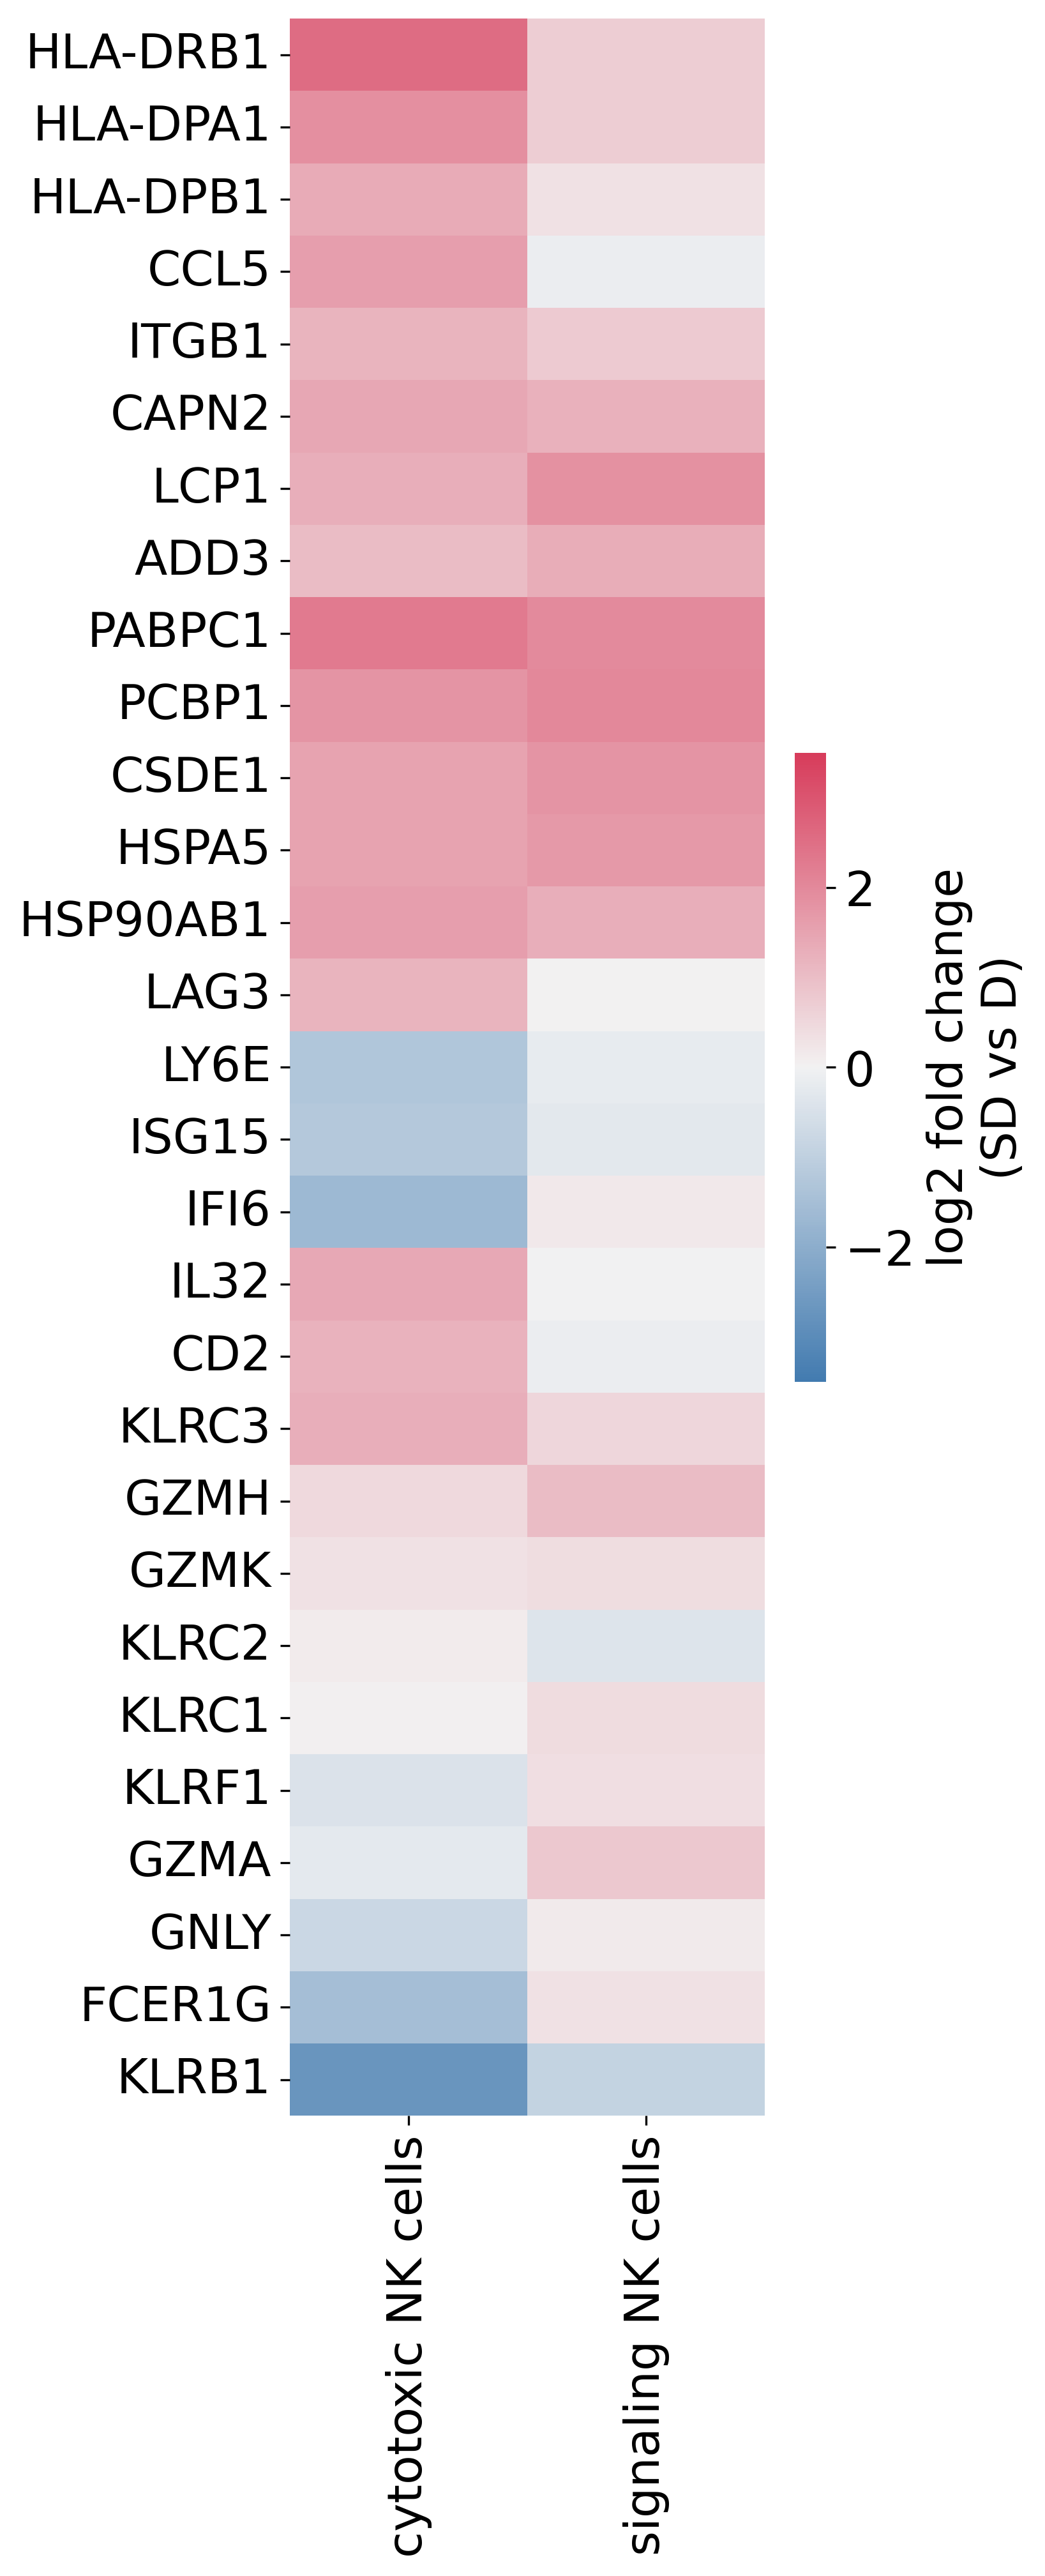

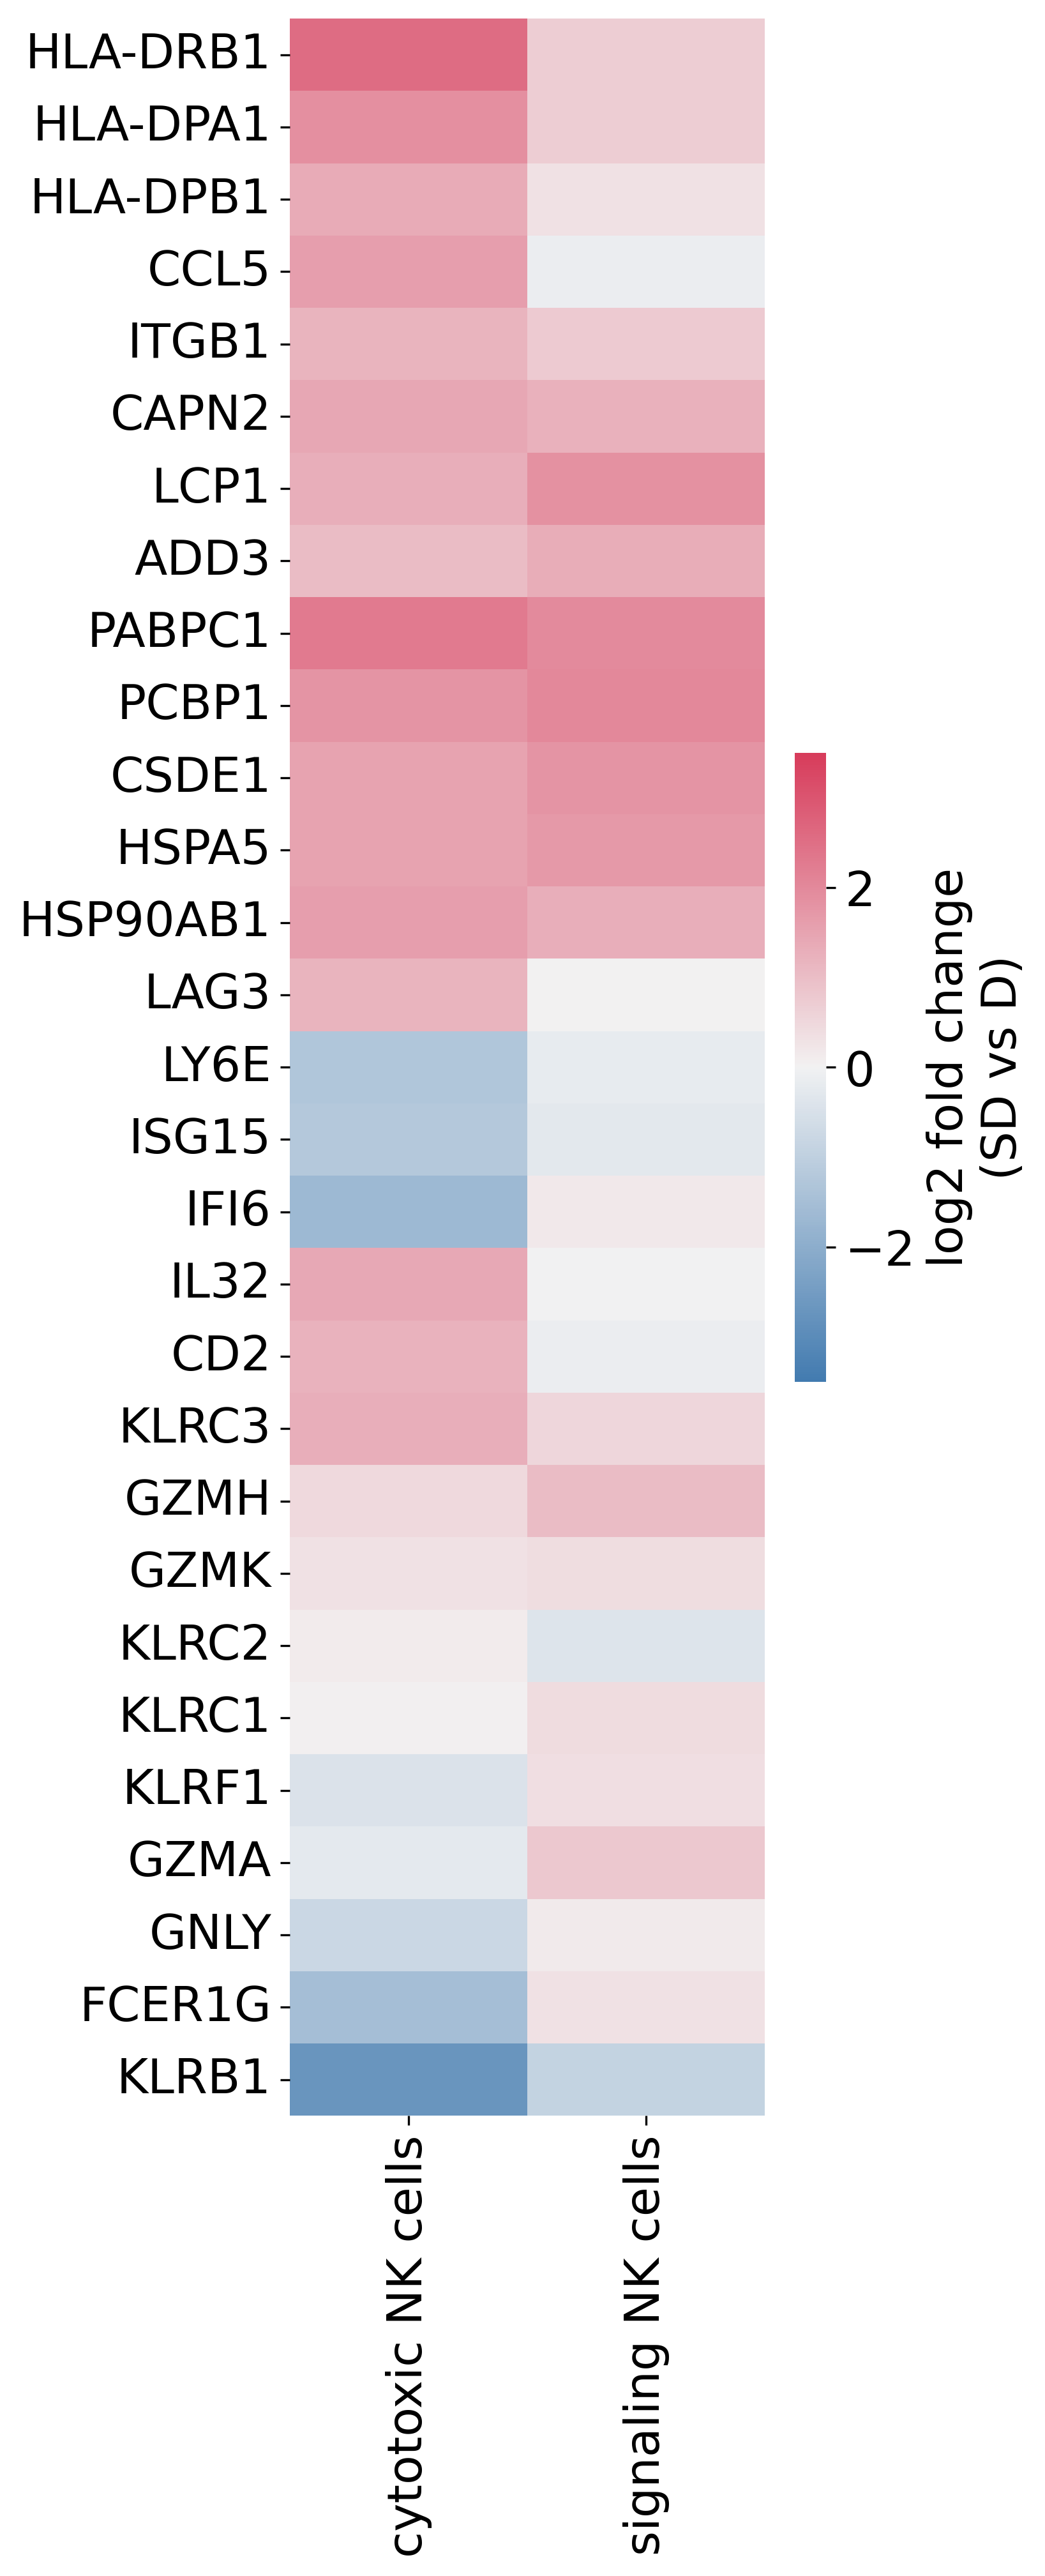

In [15]:
# Panel B
glist = [ 
    'HLA-DRB1', 'HLA-DPA1', 'HLA-DPB1', 'CCL5', 'ITGB1',  # NK activation
    'CAPN2','LCP1', 'ADD3', # cytoskeleton
    'PABPC1', 'PCBP1', 'CSDE1', 'HSPA5', 'HSP90AB1', # translation
    'LAG3', # immunosuppression
    'LY6E', 'ISG15', 'IFI6', # ISG
     #'XCL1', 'CCL4', # cytokines 
    'IL32', 'CD2','KLRC3', 'GZMH', 'GZMK', 'KLRC2', 'KLRC1', # upregulation in adaptive NK cells
    'KLRF1', 'GZMA','GNLY', 'FCER1G', 'KLRB1', # downregulation in adaptive NK cells
]

heatmap_cst(cst_pair, glist, ['cytotoxic NK cells', 'signaling NK cells'], save_fd='NK_cst_heatmap.pdf')
heatmap_cst(cst_pair, glist, ['cytotoxic NK cells', 'signaling NK cells'], save_fd='NK_cst_heatmap.png')

In [13]:
# panel C fraction of KLRC2 cytotoxic NK cells in IDs
fras = {}

adata_temp = adata_kid[(adata_kid.obs['ID'] != '1_075_01') & (adata_kid.obs['ID'] != '6_029_01')]
for cd in ['S_dengue', 'dengue']:
    fras[cd] = []
    temp = adata_temp[(adata_temp.obs['cell_subtype_new'] == 'cytotoxic NK cells') & 
                     (adata_temp.obs['Condition'] == cd)]
    IDs = temp.obs['ID'].unique()
    for ID in IDs:
        adata_ID = temp[temp.obs['ID'] == ID]
        plus = (adata_ID[:, 'KLRC2'].X > 0).sum()
        fra = plus / adata_ID.obs.shape[0] * 100
        fras[cd].append(fra)
        
df = pd.DataFrame()
df['fra'] = fras['dengue'] + fras['S_dengue']
df['Condition'] =  ['D'] * len(fras['dengue']) + ['SD'] * len(fras['S_dengue']) 

#################

fras_a = {}
#################
adata_temp = adata_adult
for cd in ['S_dengue', 'dengue']:
    fras_a[cd] = []
    temp = adata_temp[(adata_temp.obs['cell_subtype_new'] == 'cytotoxic NK cells') & 
                     (adata_temp.obs['Condition'] == cd)]
    IDs = temp.obs['ID'].unique()
    for ID in IDs:
        adata_ID = temp[temp.obs['ID'] == ID]
        plus = (adata_ID[:, 'KLRC2'].X > 0).sum()
        fra = plus / adata_ID.obs.shape[0] * 100
        fras_a[cd].append(fra)

df_a = pd.DataFrame()
df_a['fra'] = fras['dengue'] + fras['S_dengue'] + fras_a['dengue'] + fras_a['S_dengue']
df_a['Condition'] =  ['D'] * len(fras['dengue']) + ['SD'] * len(fras['S_dengue']) + ['D_a'] * len(fras_a['dengue']) + ['SD_a'] * len(fras_a['S_dengue'])
###################


In [14]:
df

,fra,Condition
0,6.107989,D
1,1.851852,D
2,3.172867,D
3,9.472880,D
4,4.017857,D
5,17.010309,D
6,18.089172,D
7,5.056180,SD
8,32.824427,SD
9,2.905028,SD


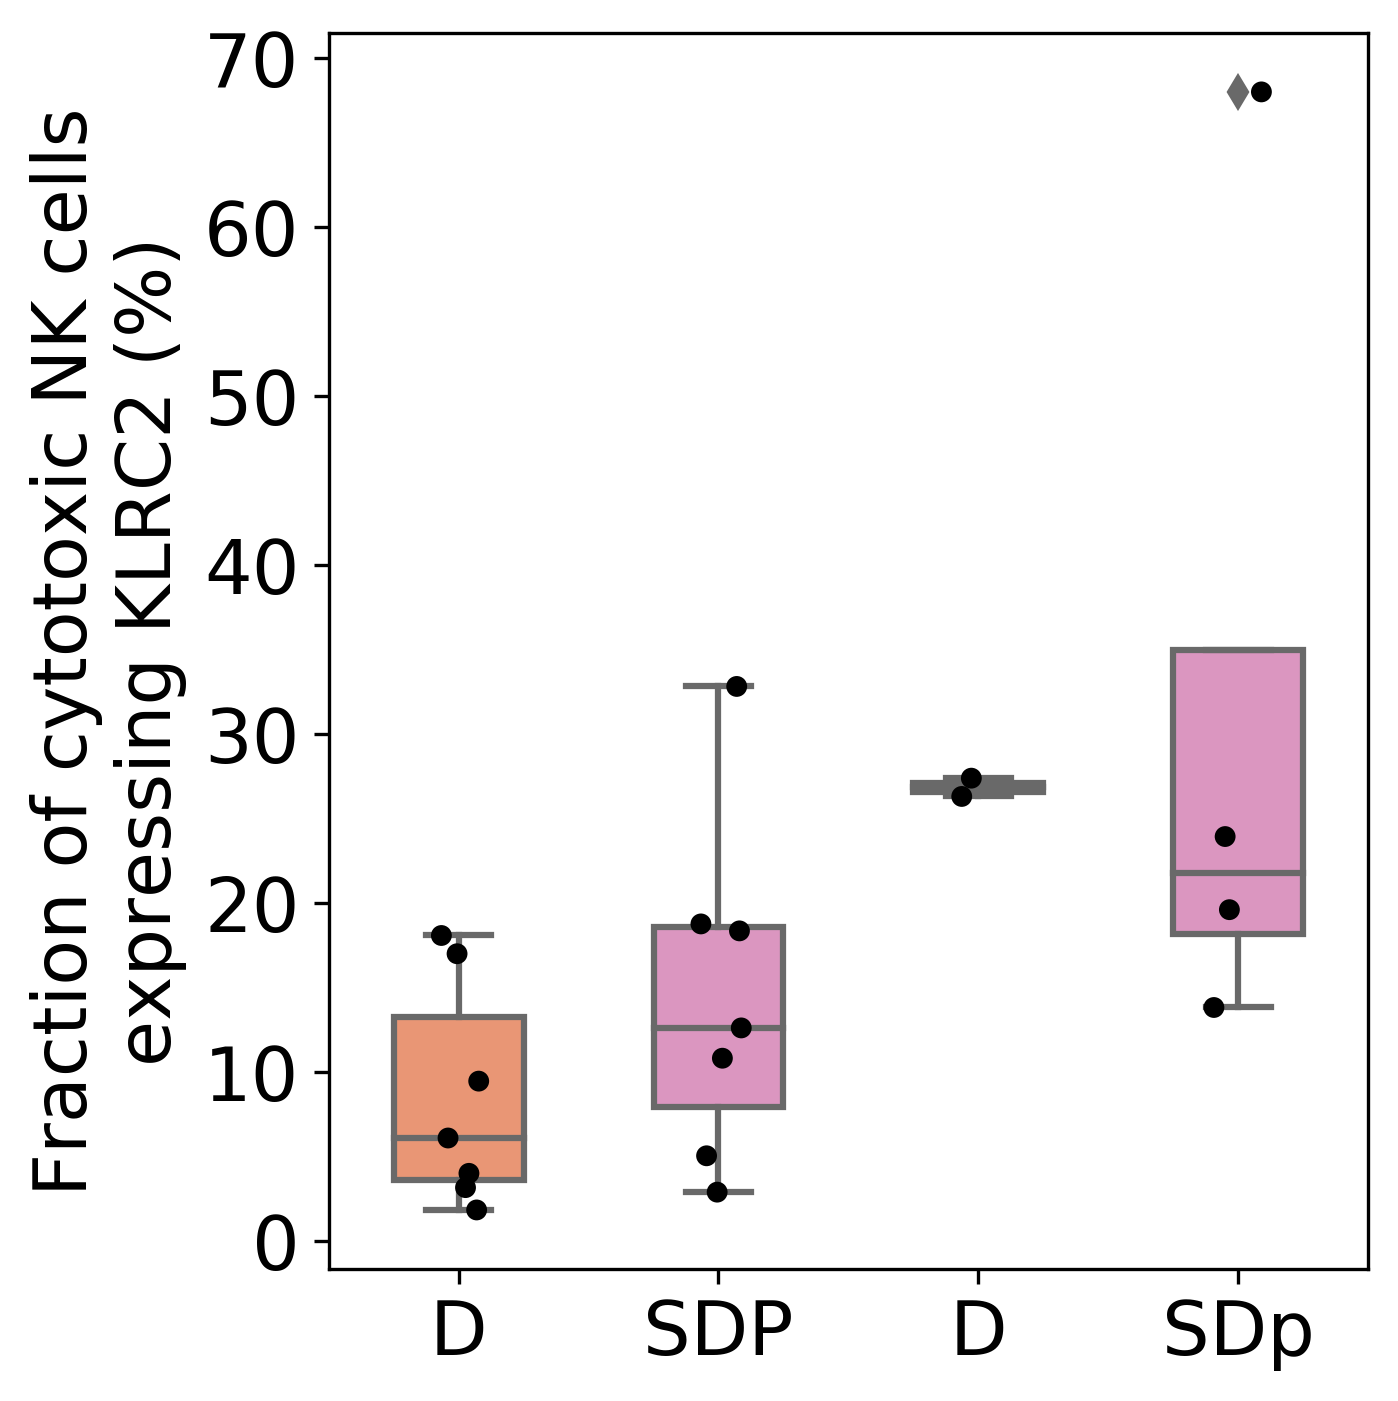

In [17]:
def KLRC2_plus(df):
    rcParams['font.size']=18
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    rcParams['figure.dpi'] = 300

    fig, ax = plt.subplots(figsize=[5, 5])
    cmap = sns.color_palette('Set2', 4)
    palette = [tuple(list(cmap[1]) + [0.8]), tuple(list(cmap[3]) + [0.8])] # 'D', 'SD'

    sns.boxplot(data = df, 
                x = 'Condition', y = 'fra', ax=ax, width=0.5, palette=palette) #, showfliers = False

    sns.stripplot(data = df, 
                  x = 'Condition', y = 'fra', color='k', s=5, ax=ax)
    
    ax.set(ylabel=None, 
           xlabel=None,
          )
    ax.set_xticklabels(['D', 'SDP','D', 'SDp'])
    ax.set_ylabel('Fraction of cytotoxic NK cells\nexpressing KLRC2 (%)')
    fig.tight_layout()
    
    fig.savefig(save_figures + 'KLRC2_toxic_NK2.pdf', bbox_inches='tight')
    fig.savefig(save_figures + 'KLRC2_toxic_NK2.png', bbox_inches='tight')
    
KLRC2_plus(df_a)

In [16]:
df[df['Condition'] == 'D']['fra'].mean()

0.08531846582774831

In [18]:
df[df['Condition'] == 'SD']['fra'].mean()

0.14481817371379396

In [27]:
from scipy.stats import ks_2samp
ks_2samp(df[df['Condition'] =='SD']['fra'], df[df['Condition'] =='D']['fra'])

KstestResult(statistic=0.42857142857142855, pvalue=0.5751748251748252)

In [28]:
from scipy.stats import f_oneway
f_oneway(df[df['Condition'] =='SD']['fra'], df[df['Condition'] =='D']['fra'])

F_onewayResult(statistic=1.702589173579923, pvalue=0.21641805661127314)

In [42]:
from scipy.stats import ttest_ind
ttest_ind(df[df['Condition'] =='SD']['fra'], df[df['Condition'] =='D']['fra'])

Ttest_indResult(statistic=1.3048330060126174, pvalue=0.2164180566112732)

In [43]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df[df['Condition'] =='SD']['fra'], df[df['Condition'] =='D']['fra'])

MannwhitneyuResult(statistic=35.0, pvalue=0.20862470862470864)

In [19]:
adata_adult = subsetdata(adata, platform ='plate')
adata_adult = normalizedata(adata_adult)
adata_adult = removegenes(adata_adult)

adata_adult = annanote_adult(adata_adult)

fras = {}
#################
adata_temp = adata_adult
for cd in ['S_dengue', 'dengue']:
    fras[cd] = []
    temp = adata_temp[(adata_temp.obs['cell_subtype_new'] == 'cytotoxic NK cells') & 
                     (adata_temp.obs['Condition'] == cd)]
    IDs = temp.obs['ID'].unique()
    for ID in IDs:
        adata_ID = temp[temp.obs['ID'] == ID]
        plus = (adata_ID[:, 'KLRC2'].X > 0).sum()
        fra = plus / adata_ID.obs.shape[0]
        fras[cd].append(fra)
        
df = pd.DataFrame()
df['fra'] = fras['dengue'] + fras['S_dengue']
df['Condition'] =  ['D'] * len(fras['dengue']) + ['SD'] * len(fras['S_dengue'])

In [21]:
df[df['Condition'] == 'D']['fra'].mean()

0.268565248738284

In [22]:
df[df['Condition'] == 'SD']['fra'].mean()

0.3134766852156408

{'figure': <Figure size 1800x1665 with 2 Axes>,
 'ax': <AxesSubplot:xlabel='log2 fold change'>}

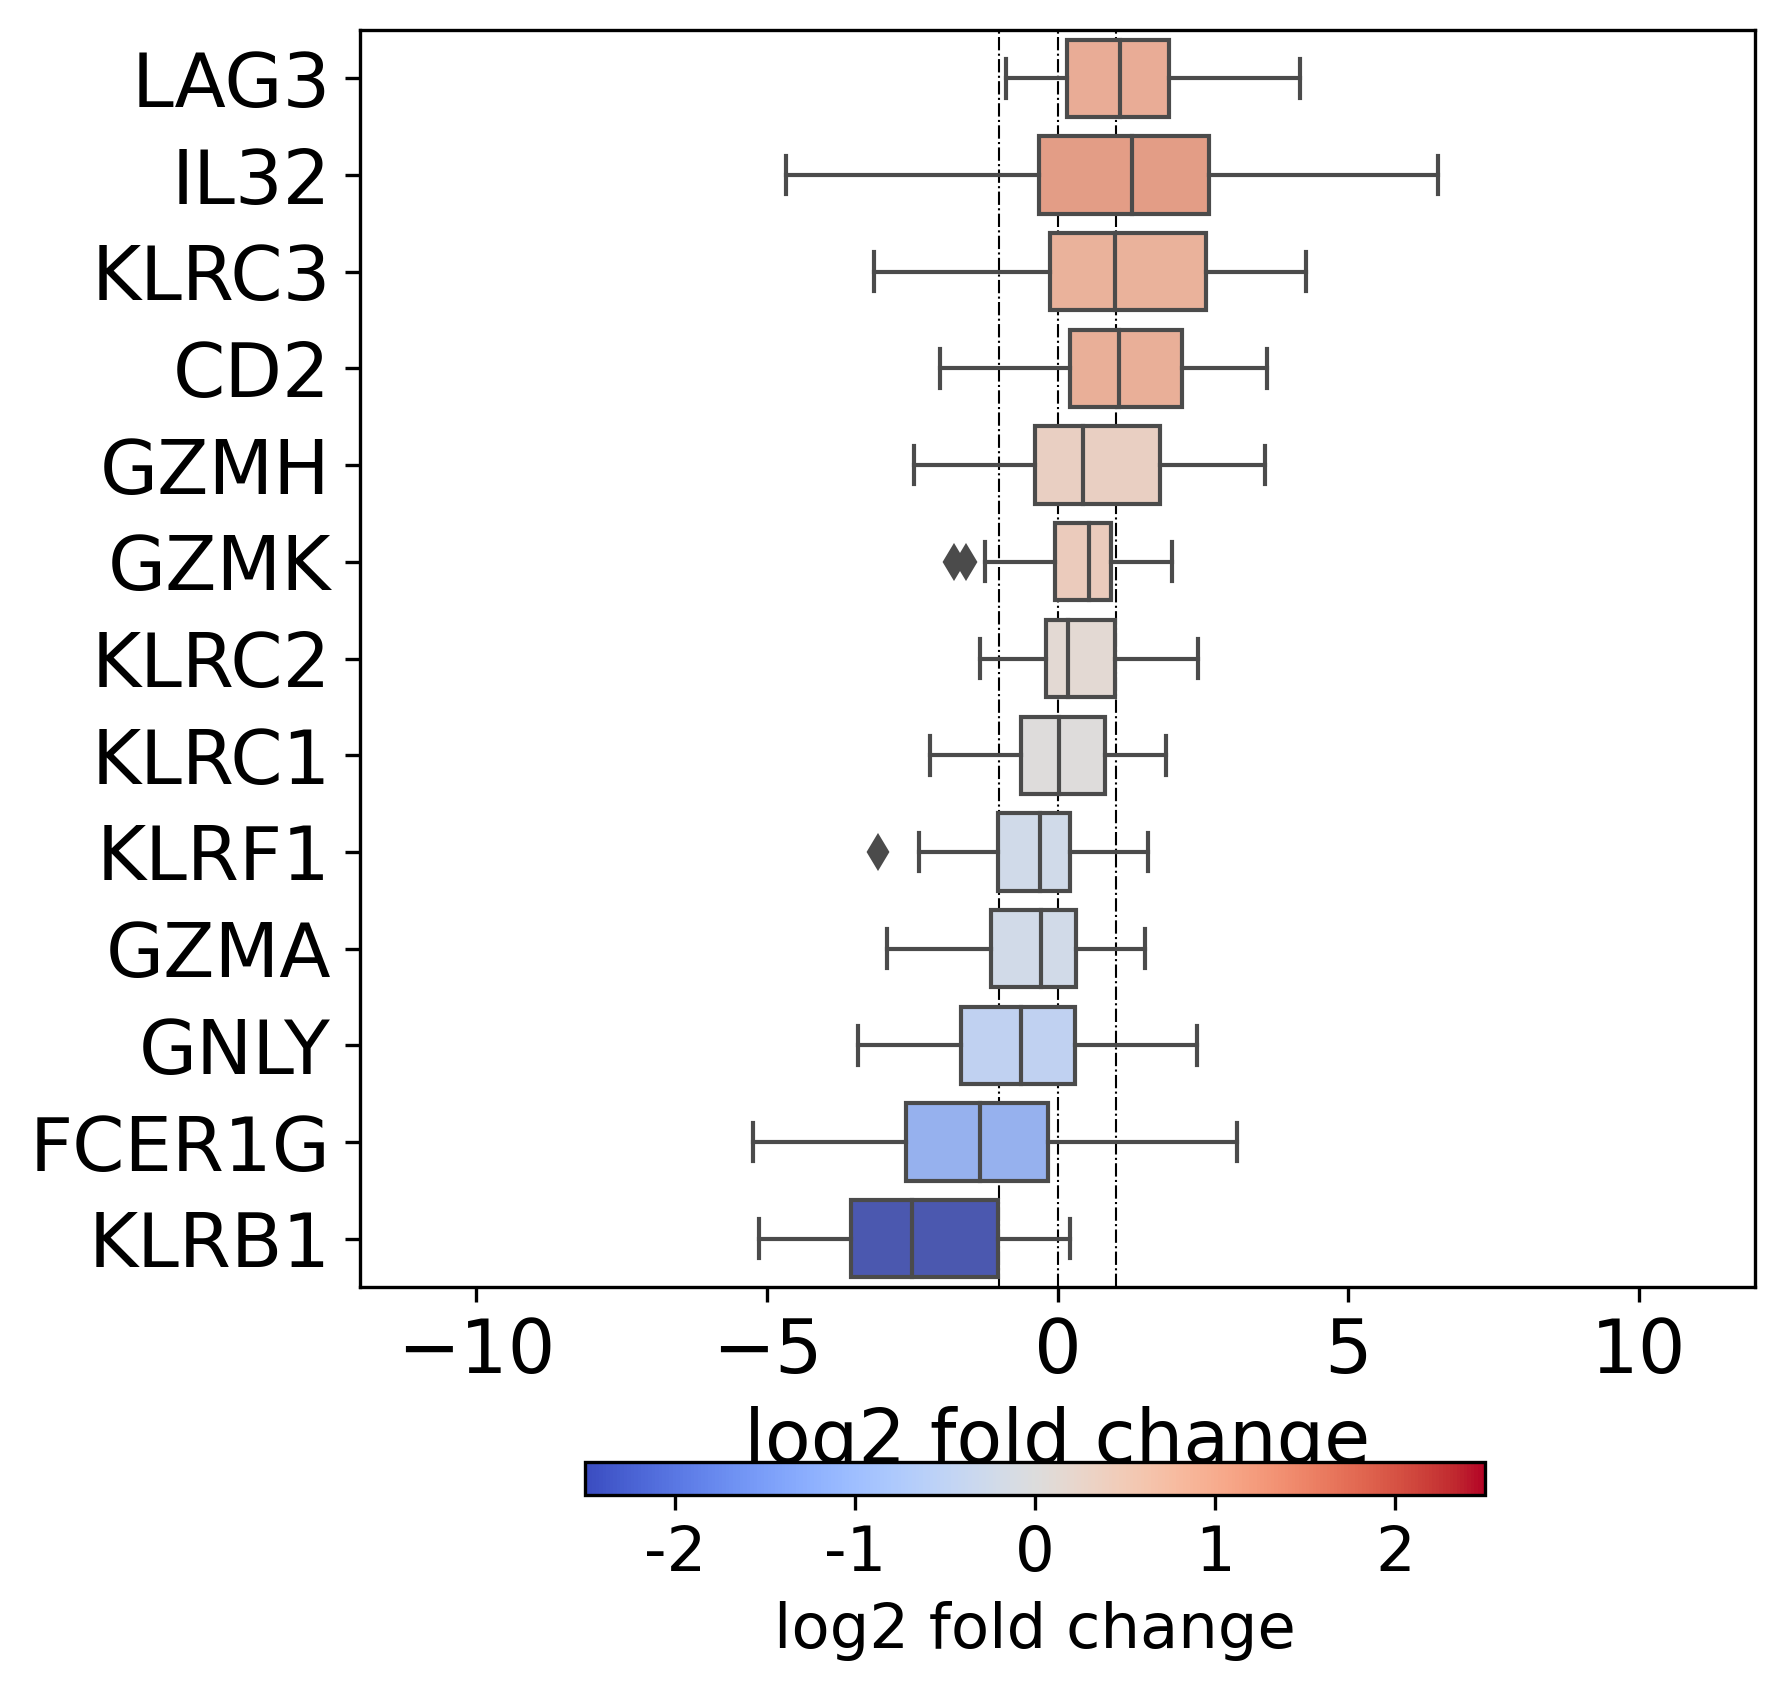

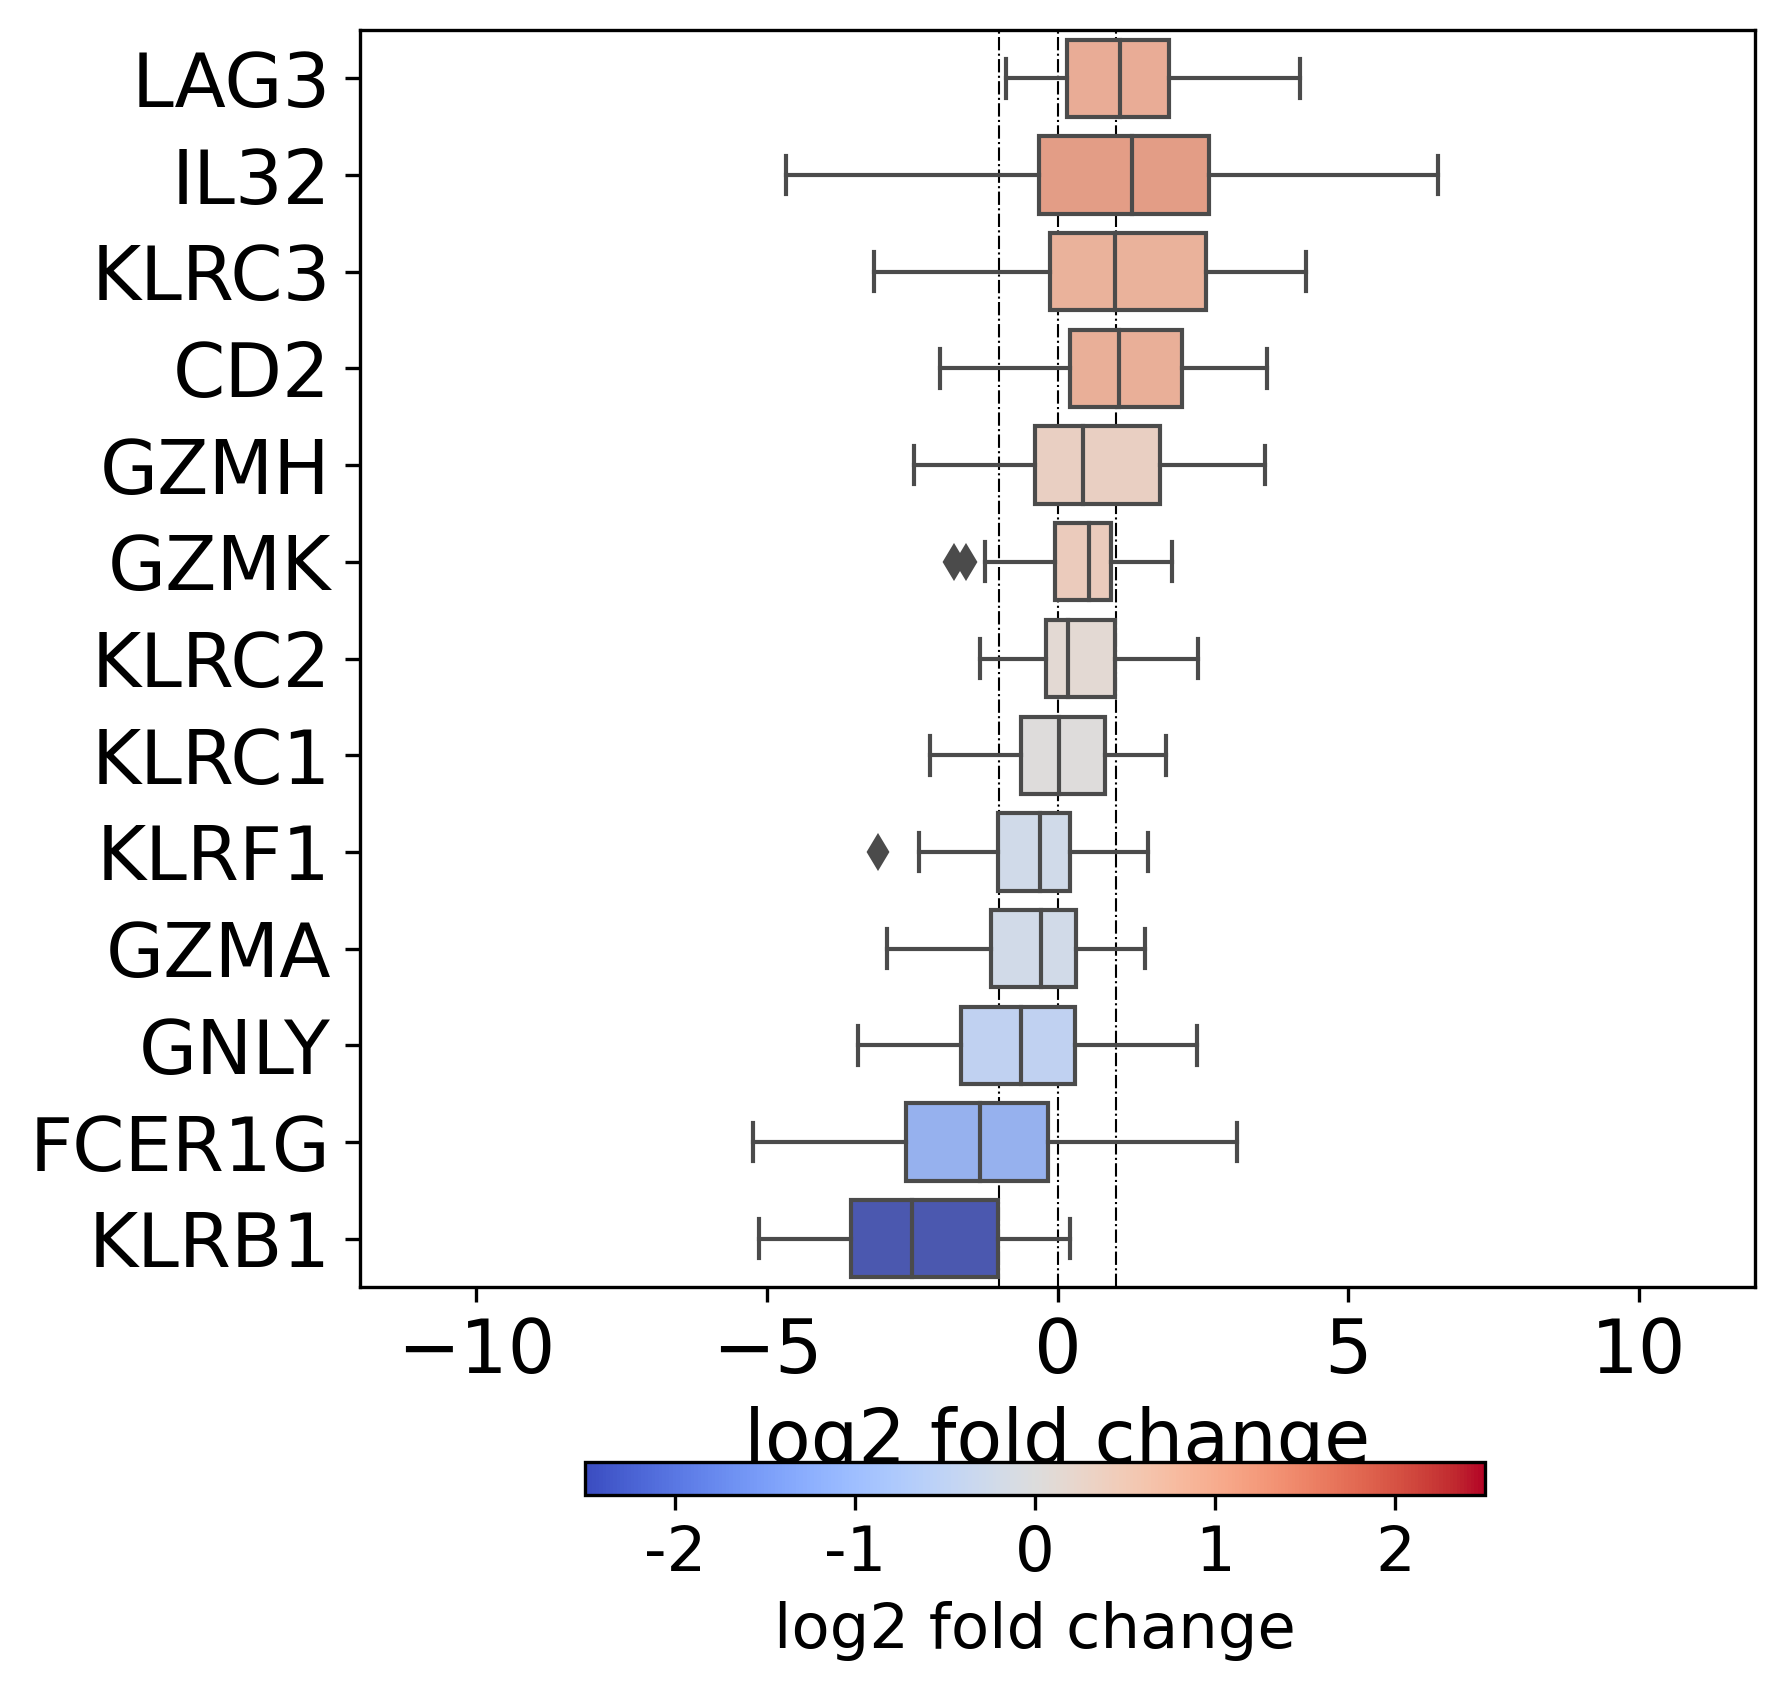

In [17]:
# panel E
child_genes = [
    'LAG3',
    'IL32', 'KLRC3', 'CD2','GZMH','GZMK', 'KLRC2',  'KLRC1', # upregulation in adaptive NK cells
    'KLRF1', 'GZMA','GNLY',  'FCER1G', 'KLRB1', # downregulation in adaptive NK cell
]
pairwise_boxplot(ct_log2FC, ['NK cells'], child_genes, path='NK_child.pdf')
pairwise_boxplot(ct_log2FC, ['NK cells'], child_genes, path='NK_child.png')

In [22]:
if False:
    adata_adult = subsetdata(adata, platform ='plate')
    adata_adult = normalizedata(adata_adult)
    adata_adult = removegenes(adata_adult)

    adata_adult = annanote_adult(adata_adult)


    csts = ['cytotoxic NK cells', 'signaling NK cells', 'proliferating plasmablasts', 'non-proliferating plasmablasts']
    pair = pair_comparison(adata_adult, 'cell_subtype_new', csts, gene_cut_off=0.1, cell_cut_off=5, log1p=2)

    pair['pair_res'].to_csv(save_tables + 'adult_cst_pair.tsv', sep='\t', index=False)
    pair['log_FCs'].to_csv(save_tables + 'adult_cst_log2FC.tsv', sep='\t')

    cts = ['Monocytes', 'NK cells', 'T cells', 'B cells', 'Plasmablasts']
    pair = pair_comparison(adata_adult, 'cell_type_new', cts, gene_cut_off=False, cell_cut_off=5, log1p=2)

    pair['pair_res'].to_csv(save_tables + 'adult_ct_pair.tsv', sep='\t', index=False)
    pair['log_FCs'].to_csv(save_tables + 'adult_ct_log2FC.tsv', sep='\t')

/usr/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


{'figure': <Figure size 1800x1665 with 2 Axes>,
 'ax': <AxesSubplot:xlabel='log2 fold change'>}

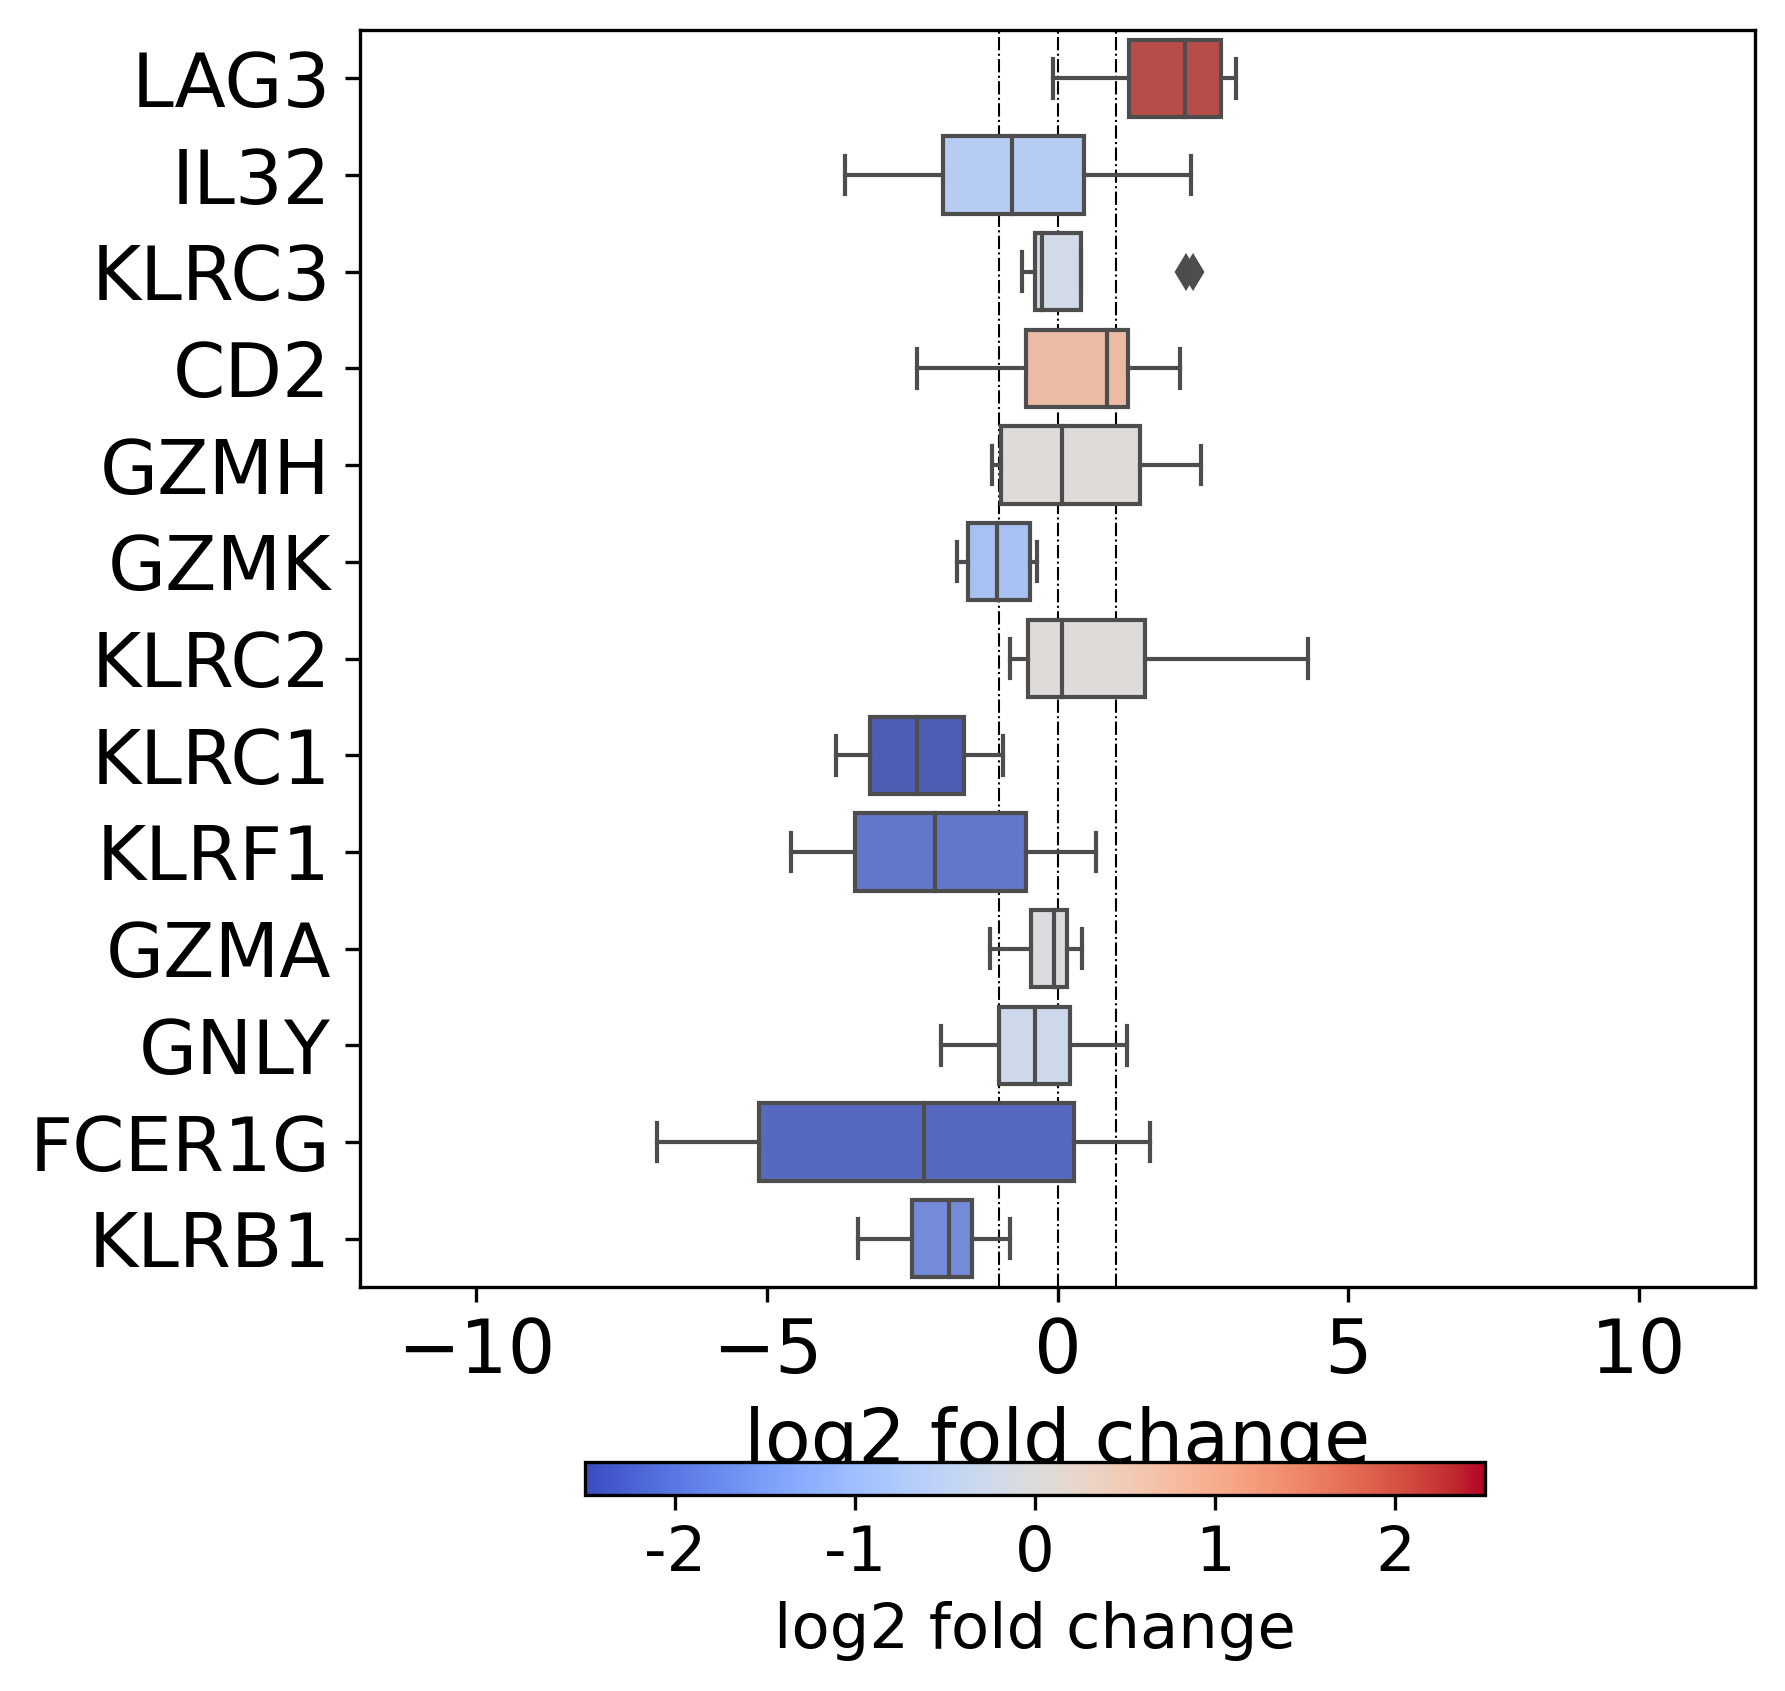

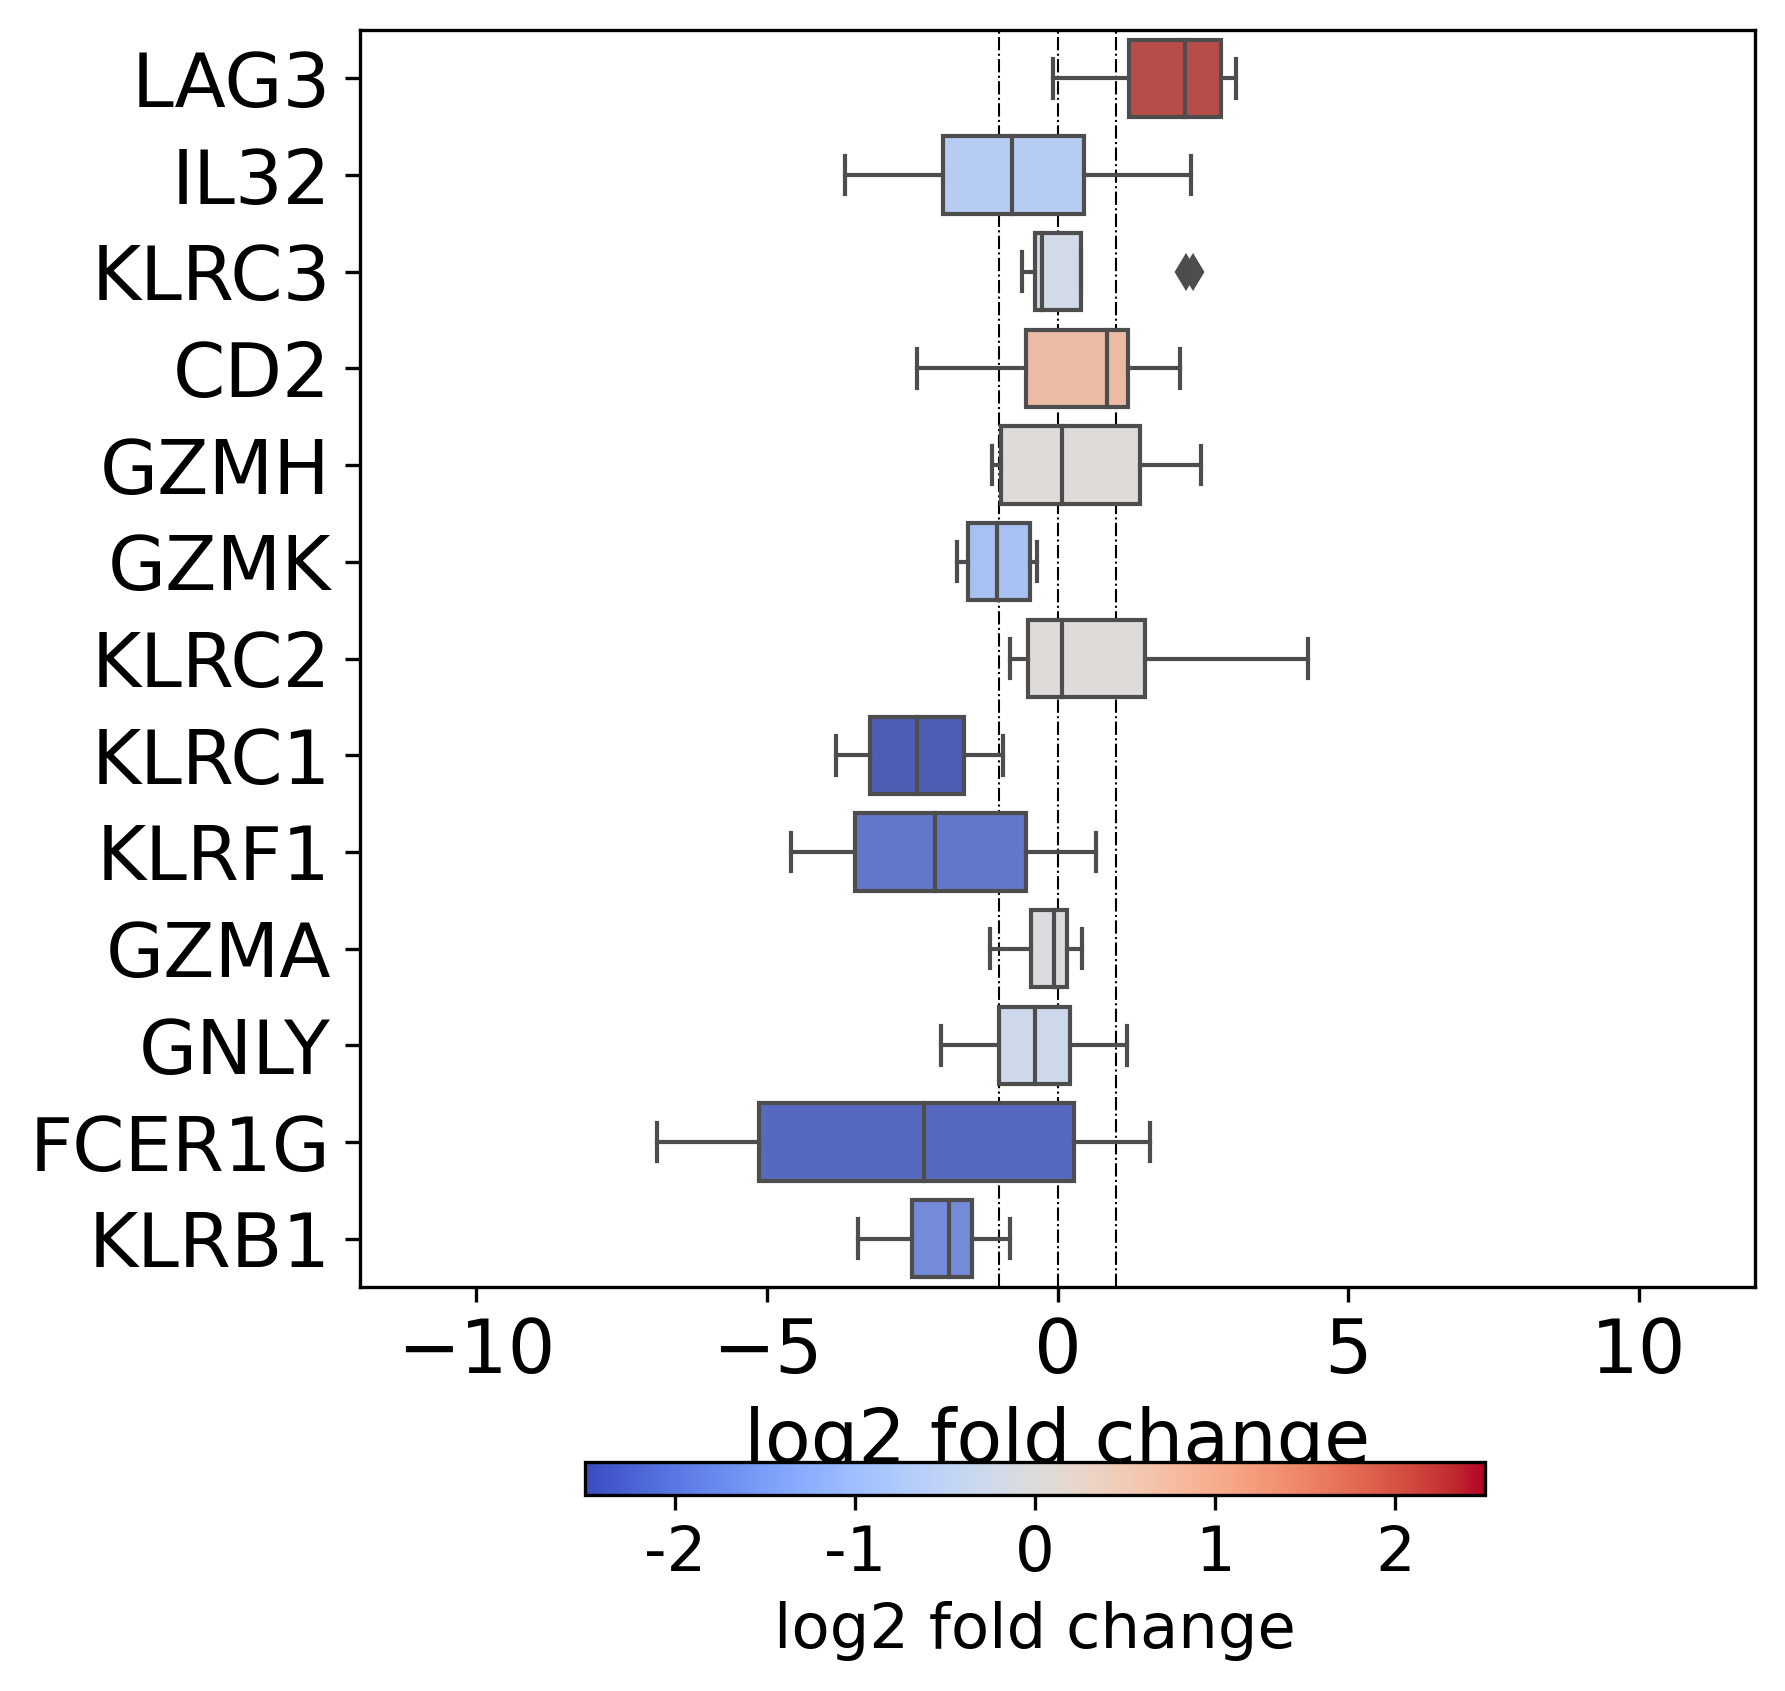

In [18]:
adult_genes = [
    'LAG3',
    'IL32', 'KLRC3', 'CD2','GZMH','GZMK', 'KLRC2',  'KLRC1', # upregulation in adaptive NK cells
    'KLRF1', 'GZMA','GNLY',  'FCER1G', 'KLRB1', # downregulation in adaptive NK cell
]
 
pairwise_boxplot(ct_log2FC_a, ['NK cells'], adult_genes, path='NK_adult.pdf')
pairwise_boxplot(ct_log2FC_a, ['NK cells'], adult_genes, path='NK_adult.png')

# Plasmablasts

In [12]:
ks_idx = ((ct_pair['log2_fold_change'] >= 1) | (ct_pair['log2_fold_change'] <= -1)) & (-np.log10(ct_pair['pvalue']) > 5)
pair_idx = (
    ((ct_pair['med_pair'] >= 1) &  (ct_pair['fra_pair'] >= (39 / 56))) |
    ((ct_pair['med_pair'] <= -1) &  (ct_pair['neg_fra_pair'] >= (39 / 56)))
)
ct_DEGs = ct_pair[ks_idx & pair_idx]

ct_DEGs_P = ct_DEGs.loc['Plasmablasts']

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
ct_DEGs_P[ct_DEGs_P['med_pair'] > 0].index

Index(['ACO2', 'AL138963.3', 'ANXA6', 'ARFGAP3', 'ATP5MF', 'BZW1', 'CBX3',
       'CCNC', 'CCND2', 'CCR2', 'CCT2', 'CMPK1', 'COL6A3', 'COPG1', 'COX17',
       'CSDE1', 'DNAJC15', 'EEF2', 'EIF4G1', 'EIF4G2', 'ELL2', 'ENTPD1',
       'FCRL5', 'GANAB', 'GRB2', 'HIST1H1B', 'HIST1H1D', 'HIST1H4C',
       'HSP90AB1', 'HSPD1', 'IGHG3', 'IGHG4', 'LAP3', 'LCP1', 'LGALS3', 'MARS',
       'MCL1', 'MTRNR2L12', 'NDUFB6', 'NDUFS5', 'NEAT1', 'NRDC', 'PABPC1',
       'PCBP1', 'PDCD5', 'PIM1', 'PIM2', 'PRDM1', 'PSAP', 'PSMD1', 'PTPRC',
       'RAC1', 'RNF213', 'RPL36A', 'SEC14L1', 'SEC23B', 'SEC31A', 'SEC62',
       'SEL1L', 'SEPT7', 'SLC38A1', 'SND1', 'SRPRA', 'STAT1', 'STK17B',
       'STT3A', 'SYNE2', 'TAP1', 'TCEA1', 'TM9SF2', 'TRAM2', 'TUBB', 'TXNIP',
       'USP48', 'VOPP1', 'XRCC5', 'YWHAE'],
      dtype='object', name='gene')

In [50]:
ct_DEGs_P[ct_DEGs_P['med_pair'] < 0].index

Index(['ARPC1B', 'C11orf98', 'CD59', 'CRIP1', 'CSNK2B', 'EEF1G', 'MRPS24',
       'MT-ATP8', 'MYCBP', 'PTPRCAP', 'RNASEK', 'RPL17', 'S100A4', 'S100A6',
       'TRAPPC5', 'UBE2V1'],
      dtype='object', name='gene')

{'figure': <Figure size 1800x2400 with 2 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcbbd49100>}

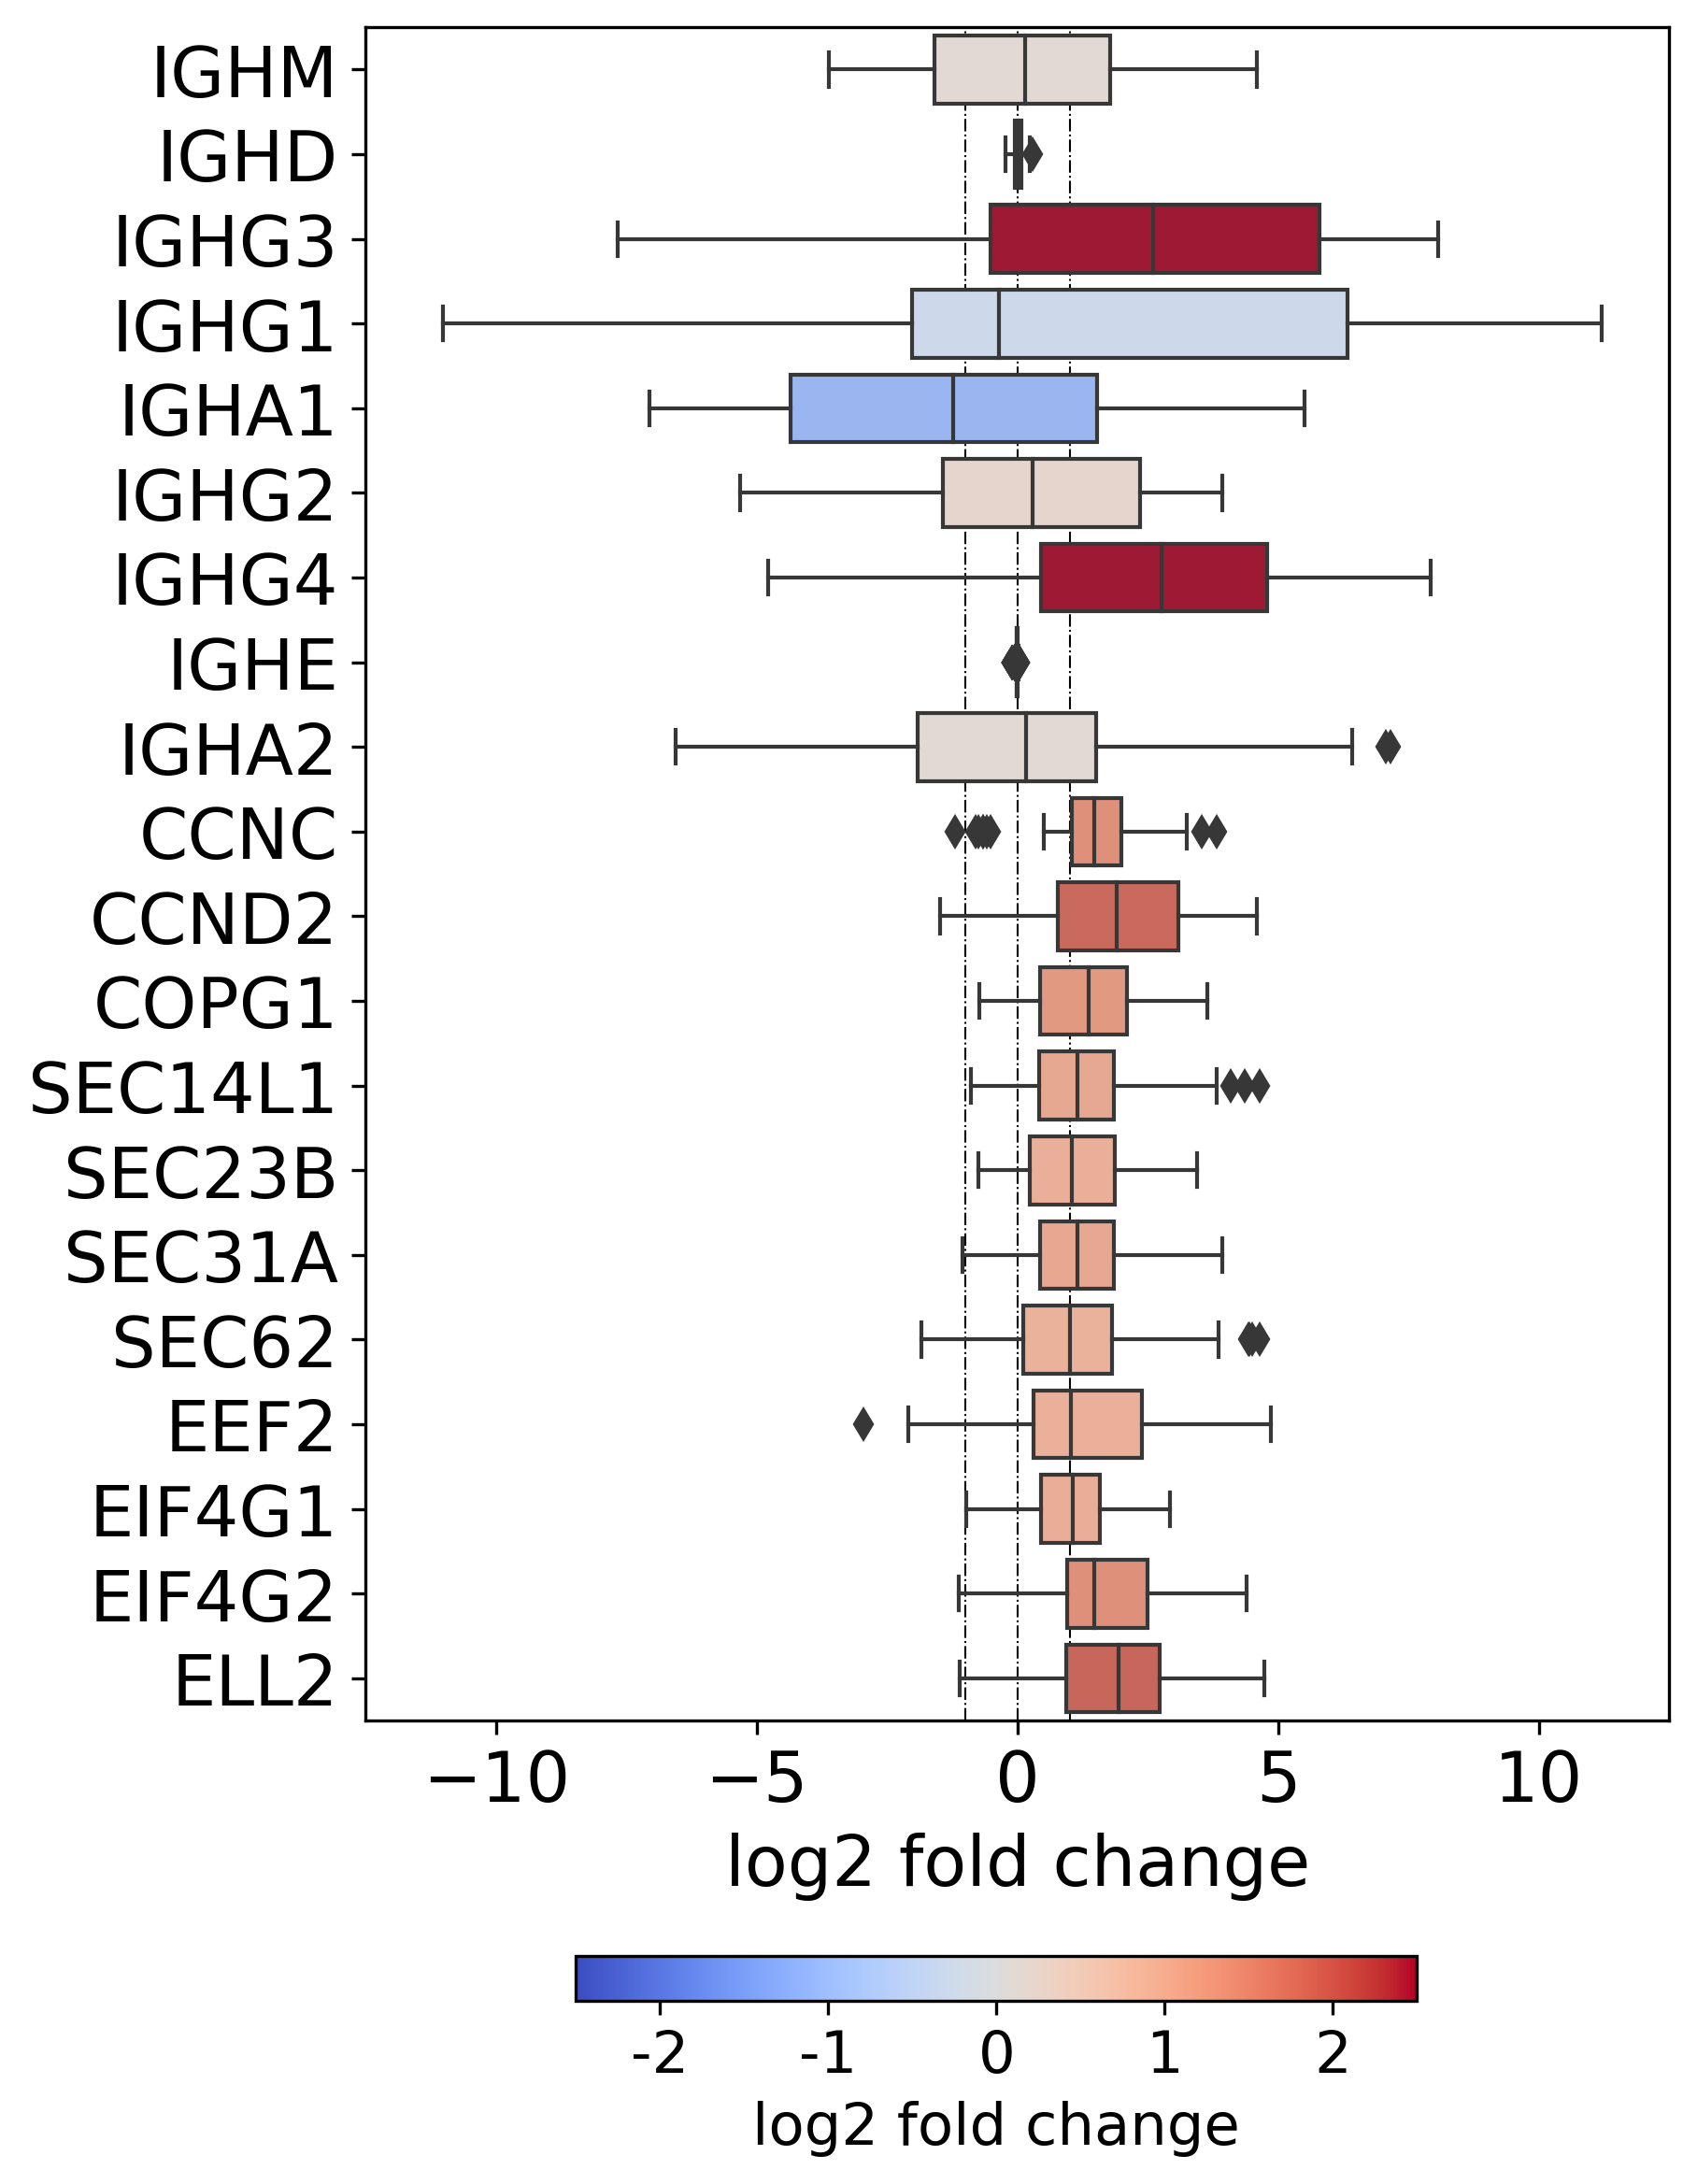

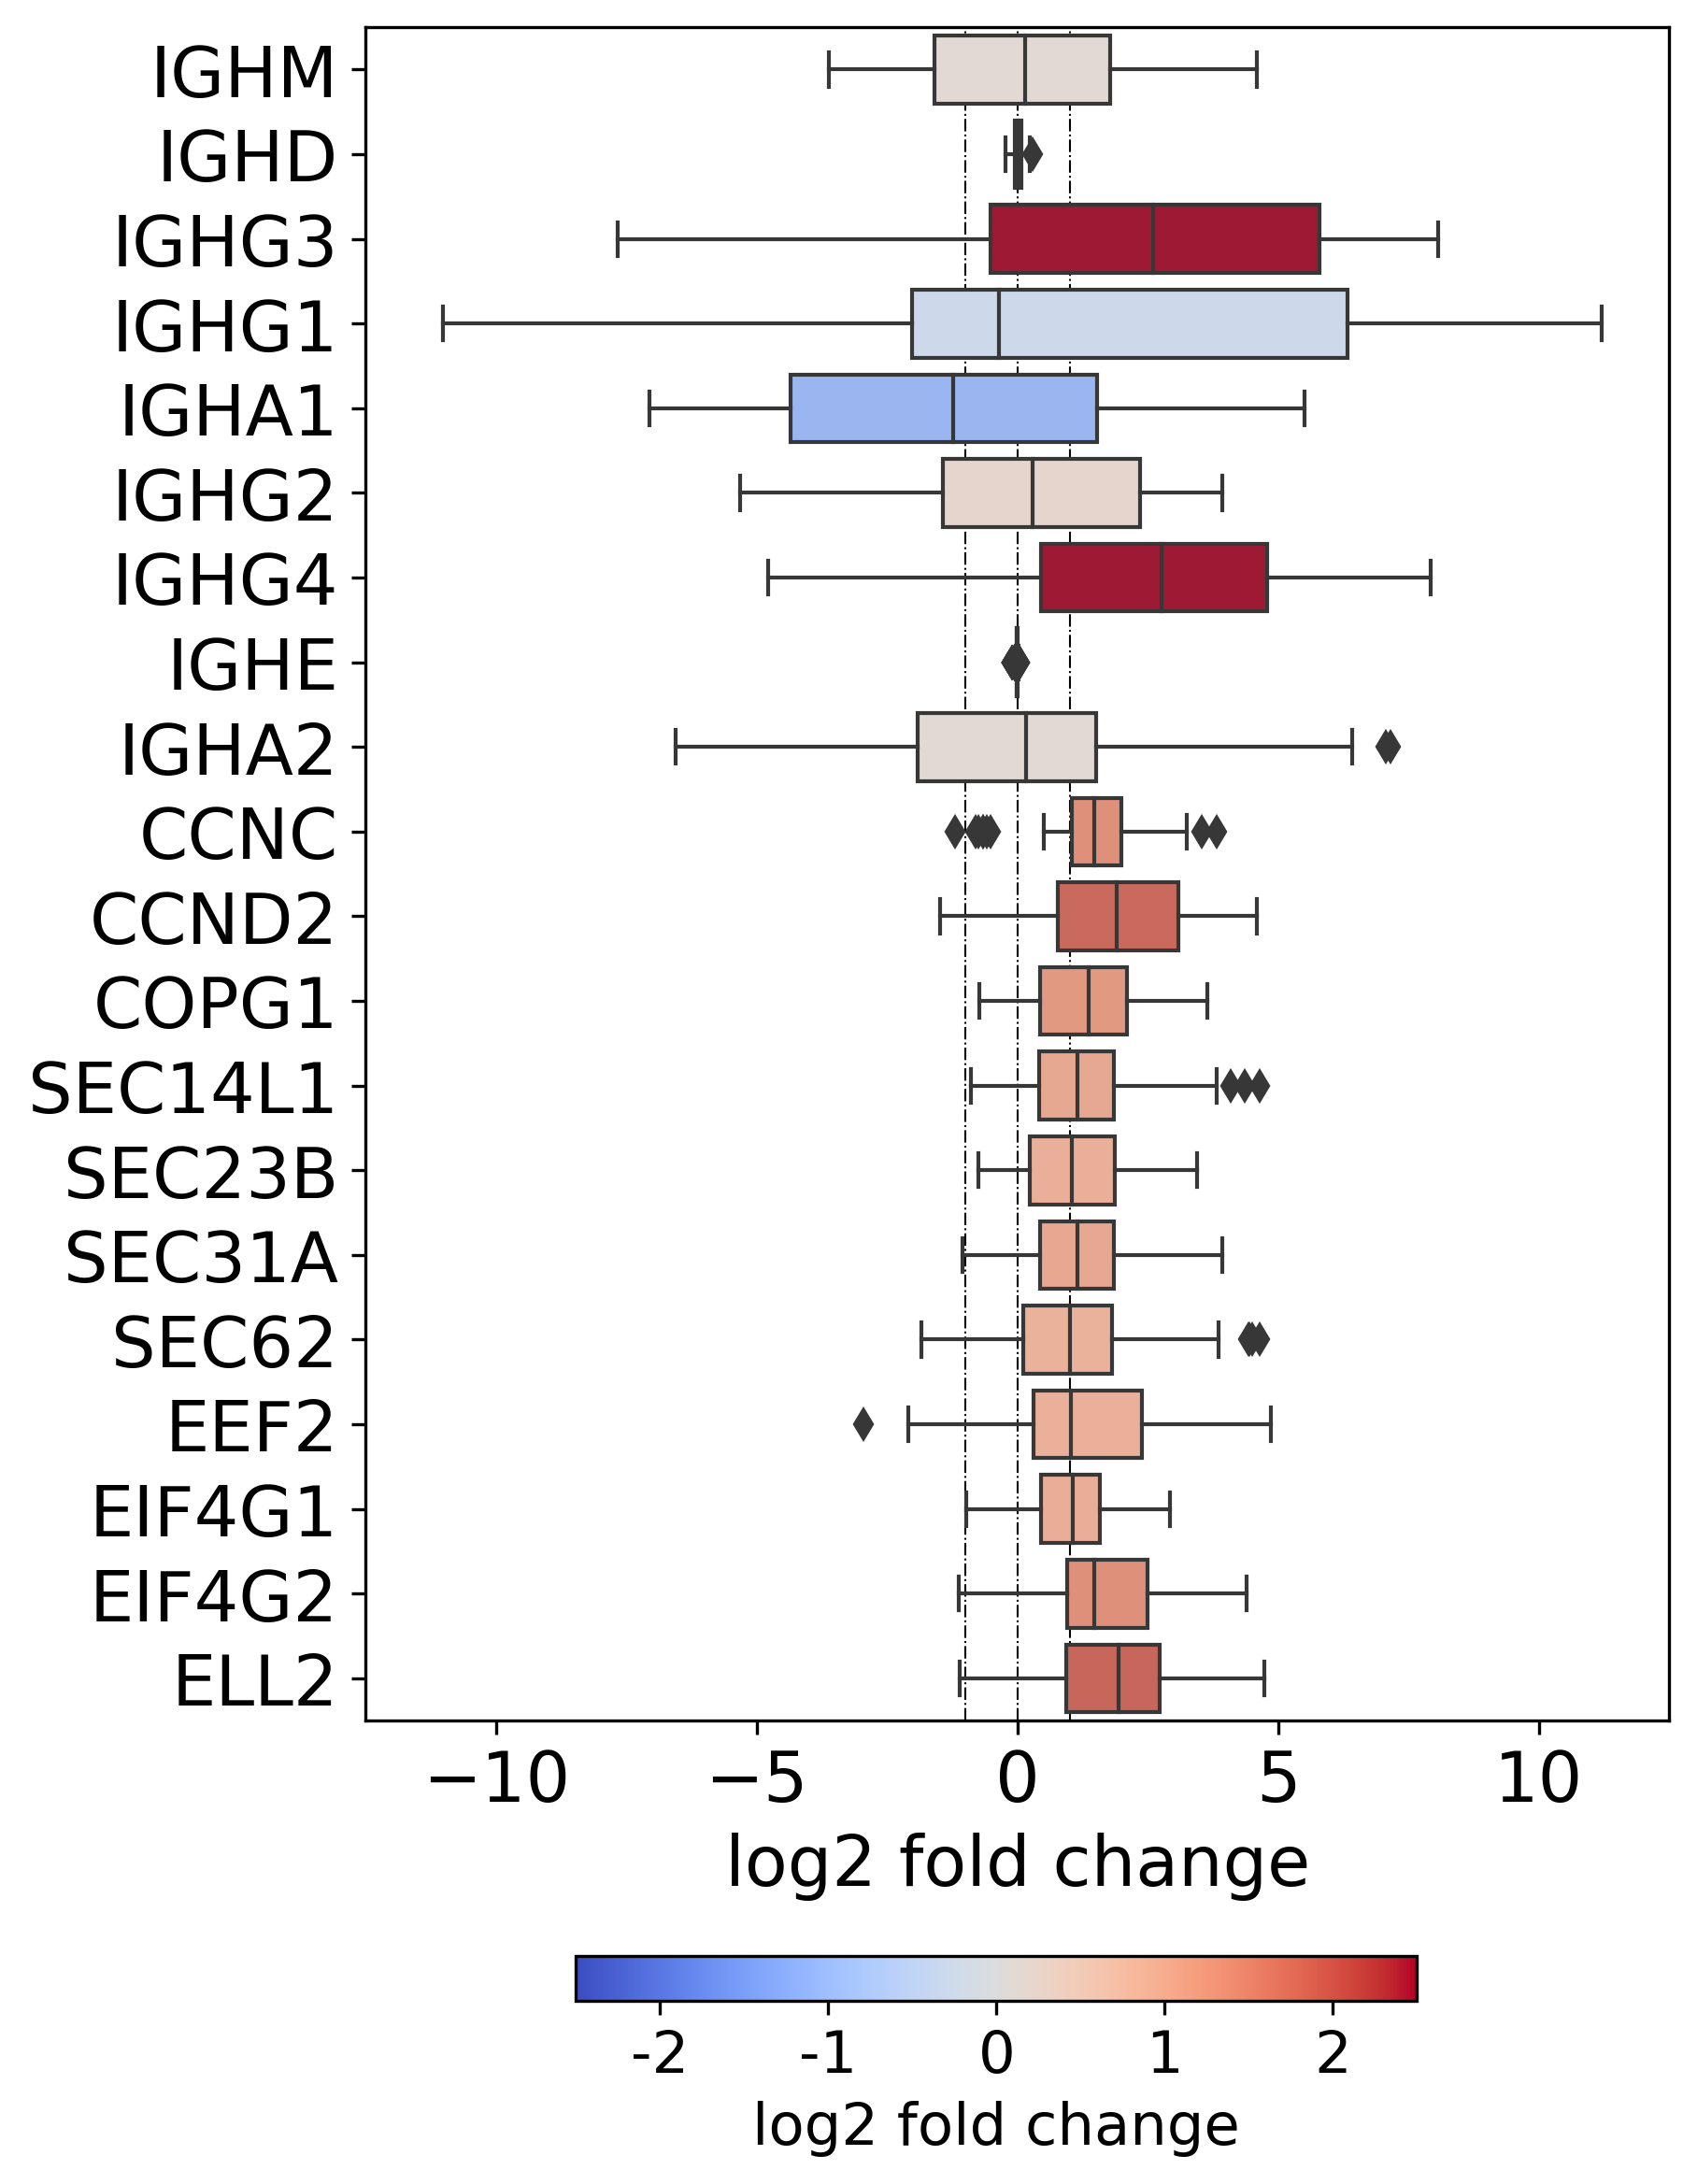

In [46]:
Plasma_genes = [ 
    'IGHM', 'IGHD', 'IGHG3', 'IGHG1', 'IGHA1', 'IGHG2', 'IGHG4', 'IGHE', 'IGHA2', 
#     'MYDGF', 'IL17A', 'IL17B','IL17C','IL17D','IL12A', 'EBI3', 'IL10', 'TNF', 'TGFB1', 'CSF2', 'IL1B', 
    #Plasma Cells, the Next Generation: Beyond Antibody Secretion
#     'AICDA',
    'CCNC', 'CCND2',
    'COPG1', 'SEC14L1', 'SEC23B', 'SEC31A', 'SEC62', 
    'EEF2', 'EIF4G1', 'EIF4G2', 'ELL2', 
#     'XBP1', 'ERN1', 'EIF2AK3', 'ATF4', 'ATF6', 'DDIT3', 'DDIT4','COPE', 
#         'IGHG1', 'IGHG2', 'IGHA1', 'IGHA2', 'IGHG3', 'IGHG4', 
               ]
pairwise_boxplot(ct_log2FC, ['Plasmablasts'], Plasma_genes, path='box_Plasma_genes.pdf', xlim=12.5) # 
pairwise_boxplot(ct_log2FC, ['Plasmablasts'], Plasma_genes, path='box_Plasma_genes.png', xlim=12.5)

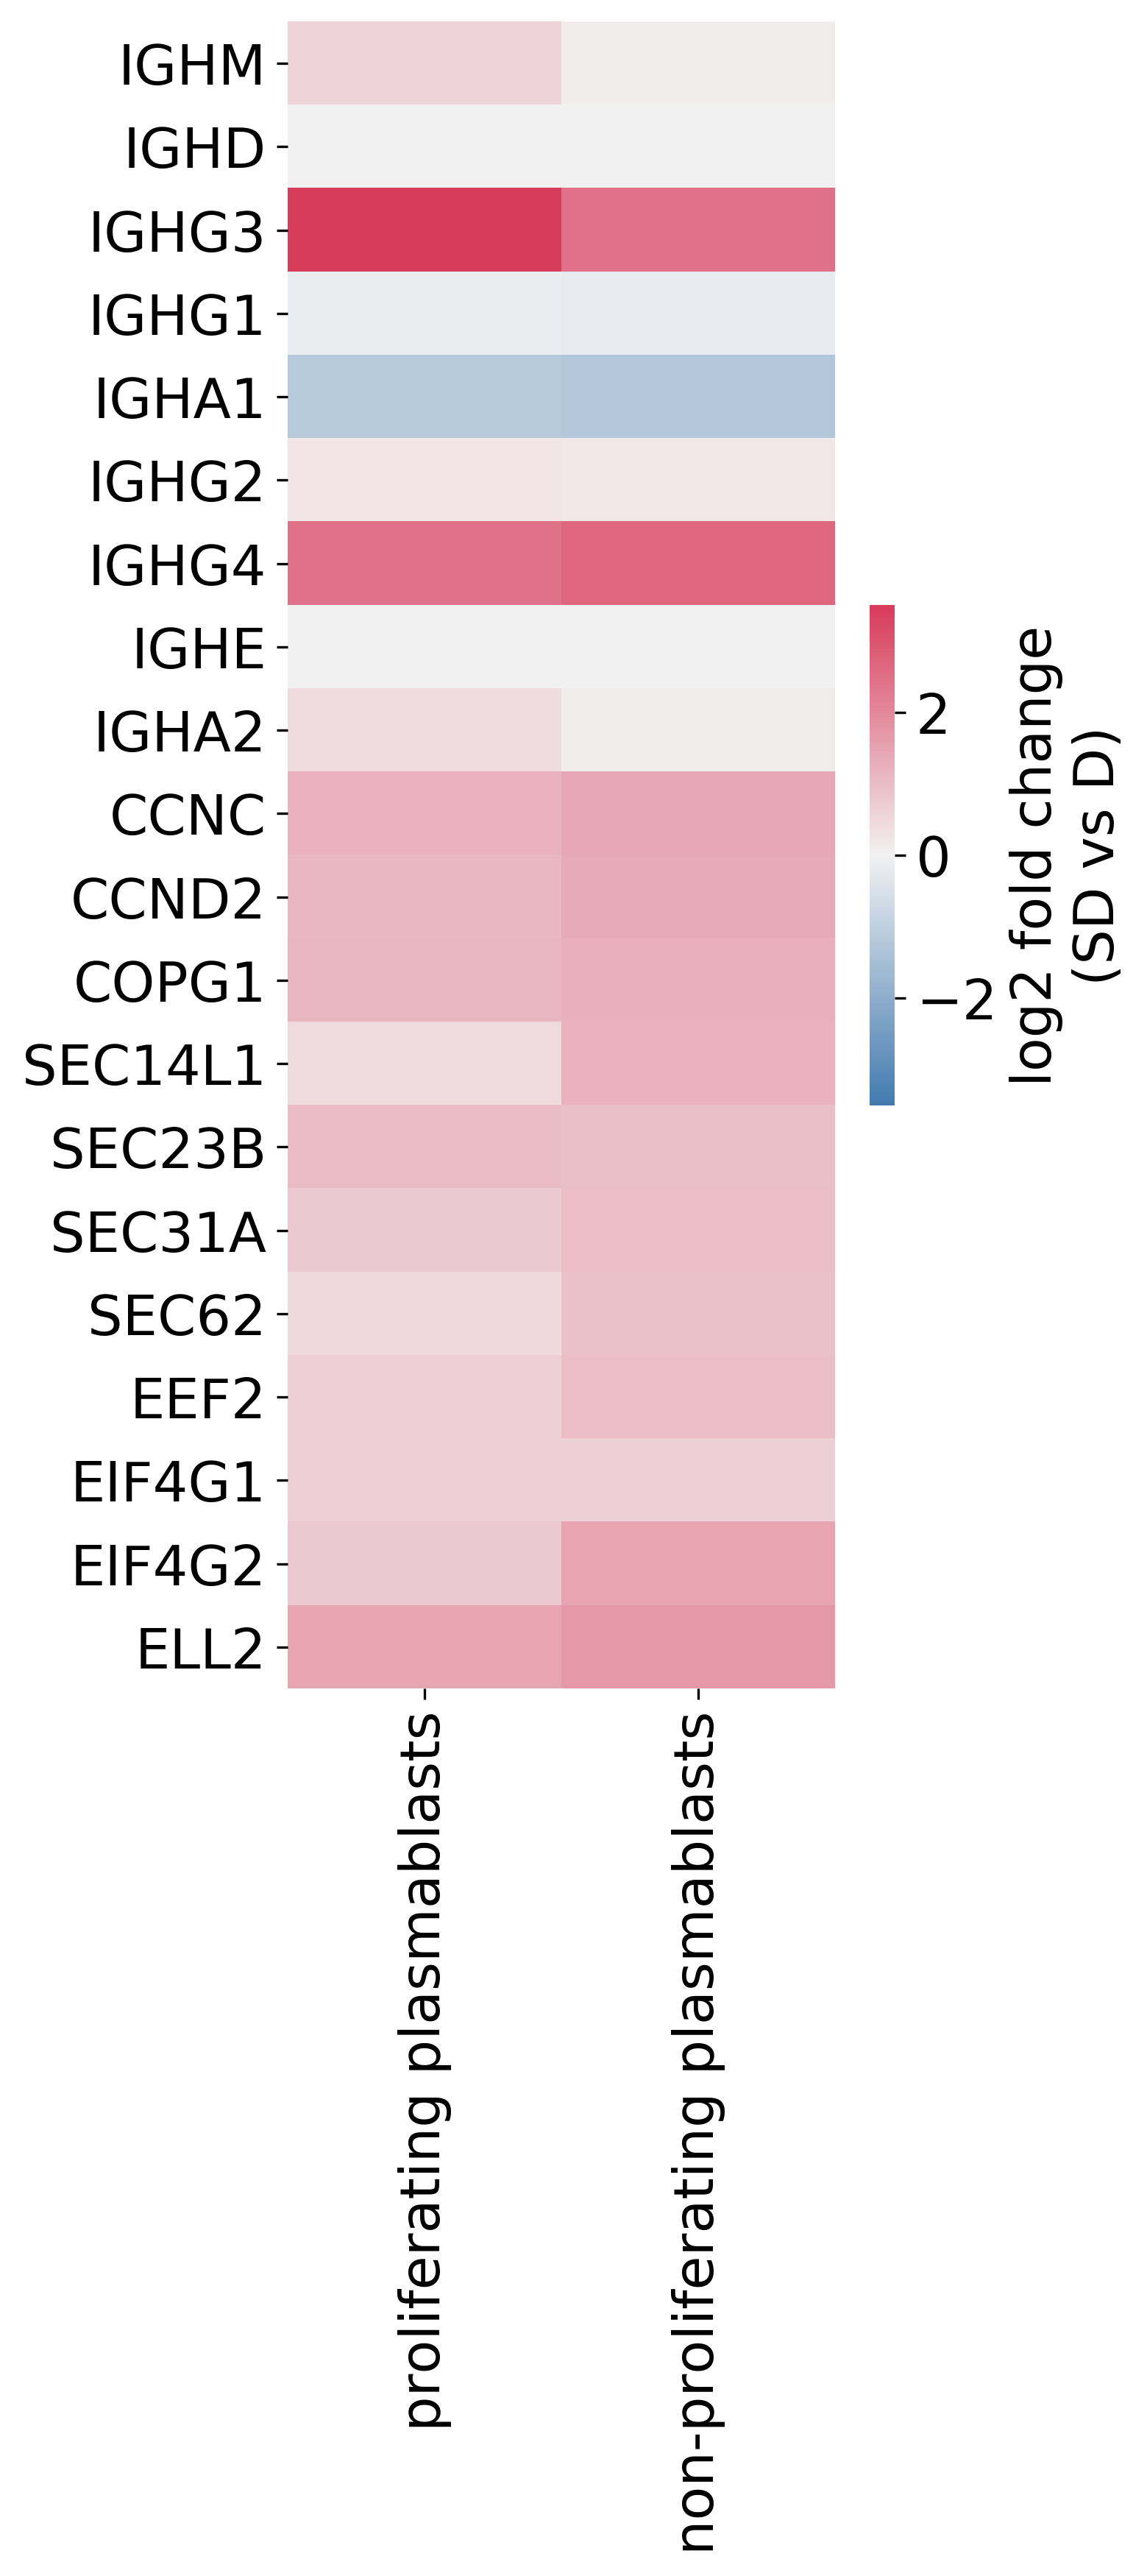

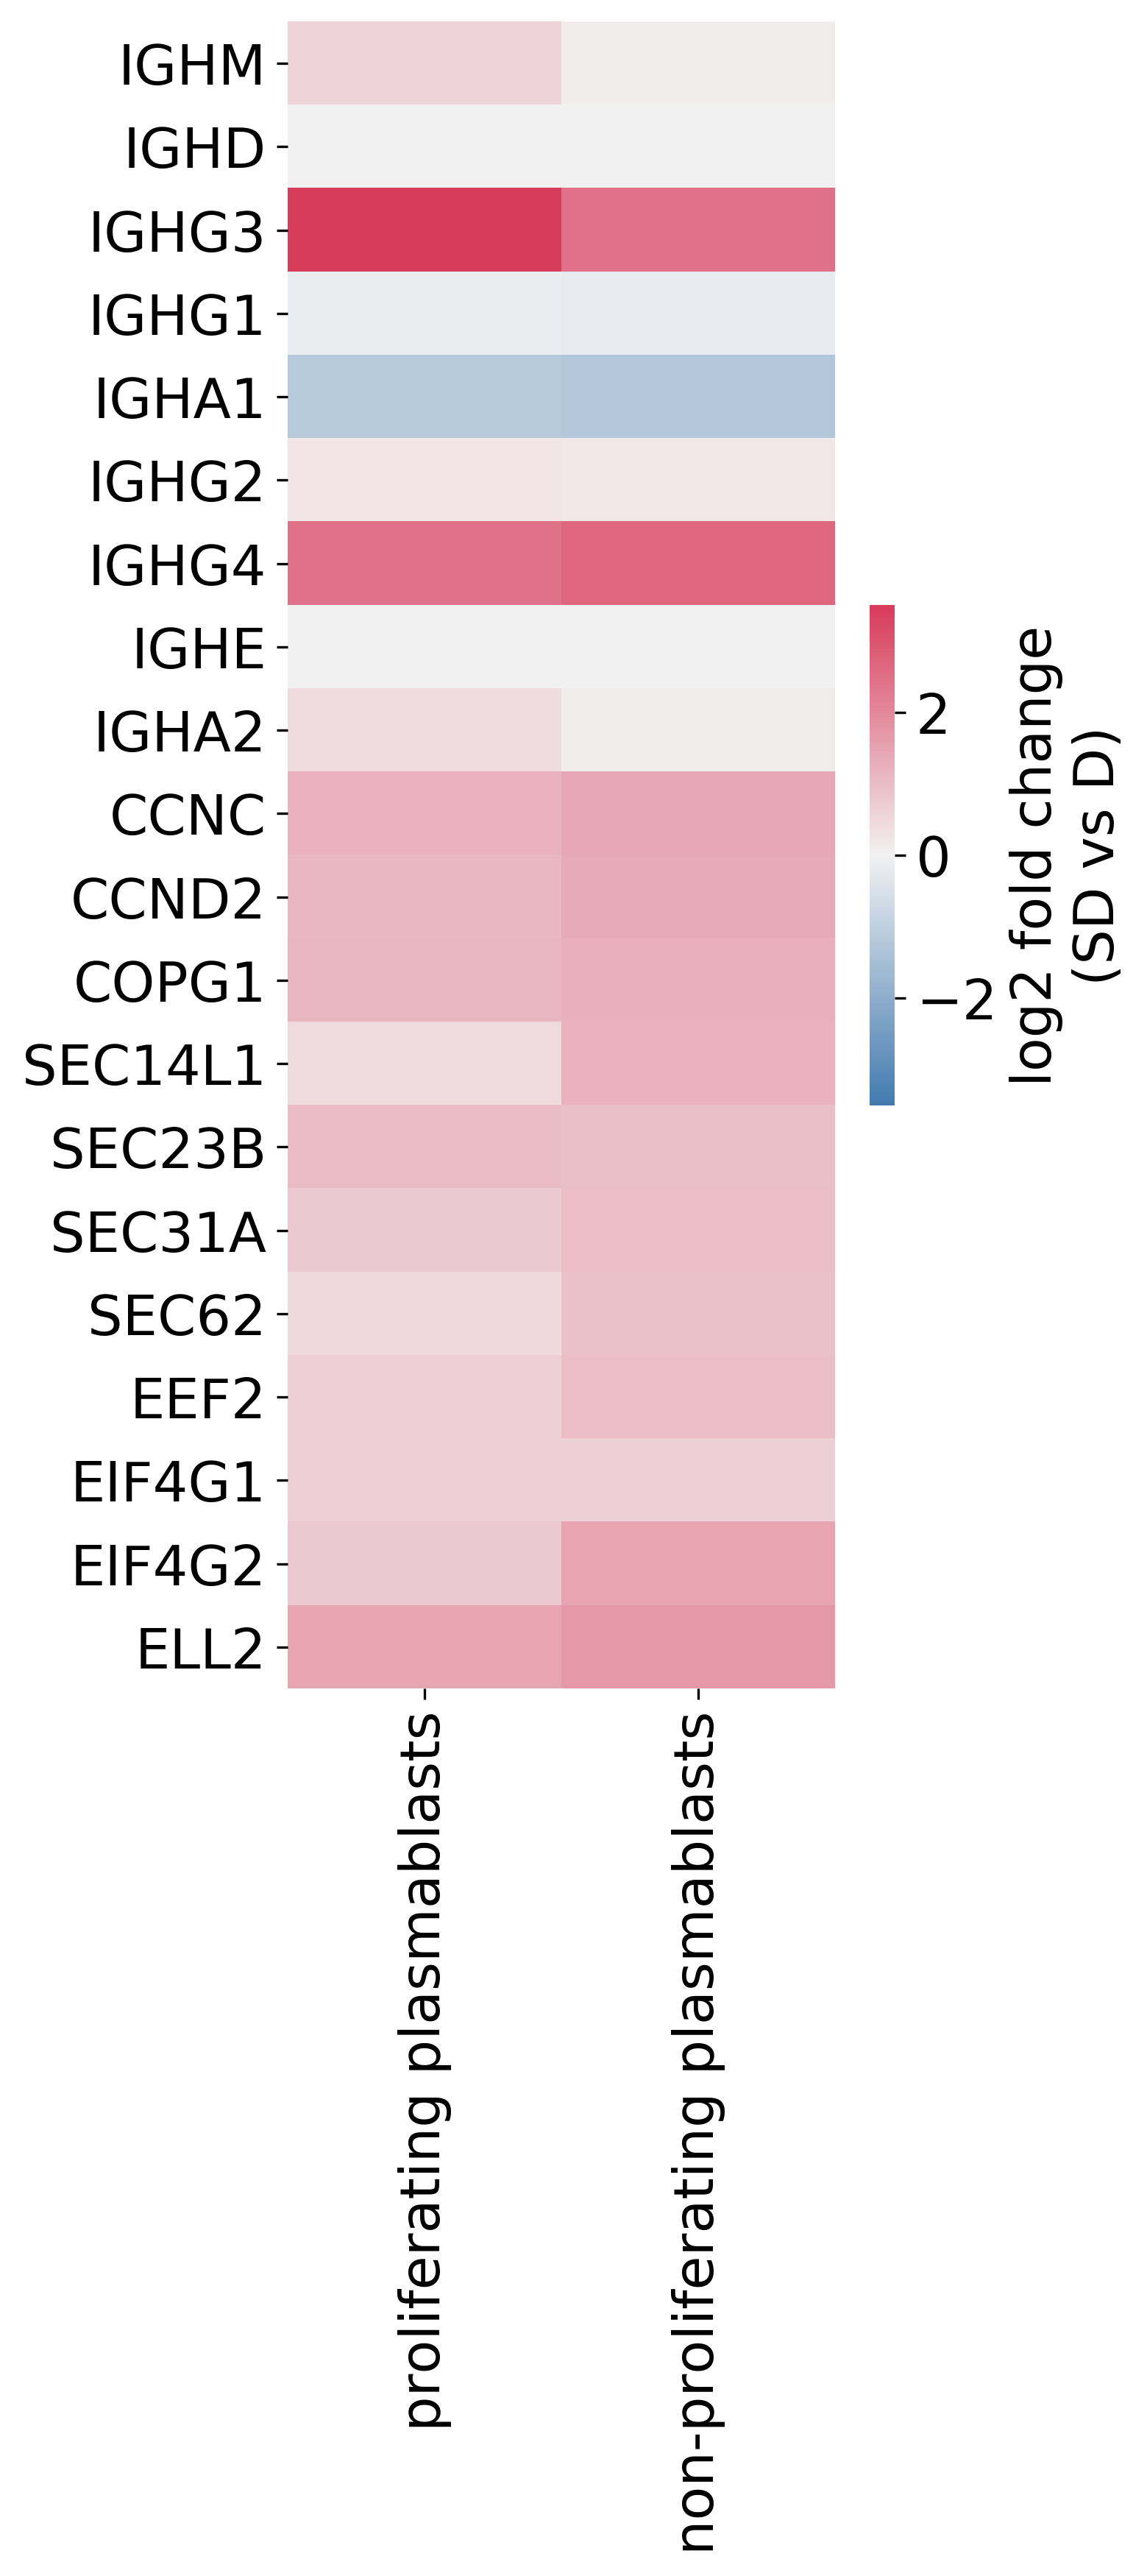

In [47]:
if False:
    glist = [
    'IGHM', 'IGHD', 'IGHG3', 'IGHG1', 'IGHA1', 'IGHG2', 'IGHG4', 'IGHE', 'IGHA2', 
#     'MYDGF', 'IL17A', 'IL17B','IL17C','IL17D','IL12A', 'EBI3', 'IL10', 'TNF', 'TGFB1', 'CSF2', 'IL1B', 
    #Plasma Cells, the Next Generation: Beyond Antibody Secretion
#     'AICDA',
    'CCNC', 'CCND2',
    'COPG1', 'SEC14L1', 'SEC23B', 'SEC31A', 'SEC62', 
    'EEF2', 'EIF4G1', 'EIF4G2', 'ELL2', 
    ]
    
    heatmap_cst(cst_pair, glist, ['proliferating plasmablasts', 'non-proliferating plasmablasts'], 
                save_fd='Plasma_cst_heatmap.pdf')
    heatmap_cst(cst_pair, glist, ['proliferating plasmablasts', 'non-proliferating plasmablasts'], 
                save_fd='Plasma_cst_heatmap.png')

{'figure': <Figure size 1800x2190 with 2 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcbbbbef40>}

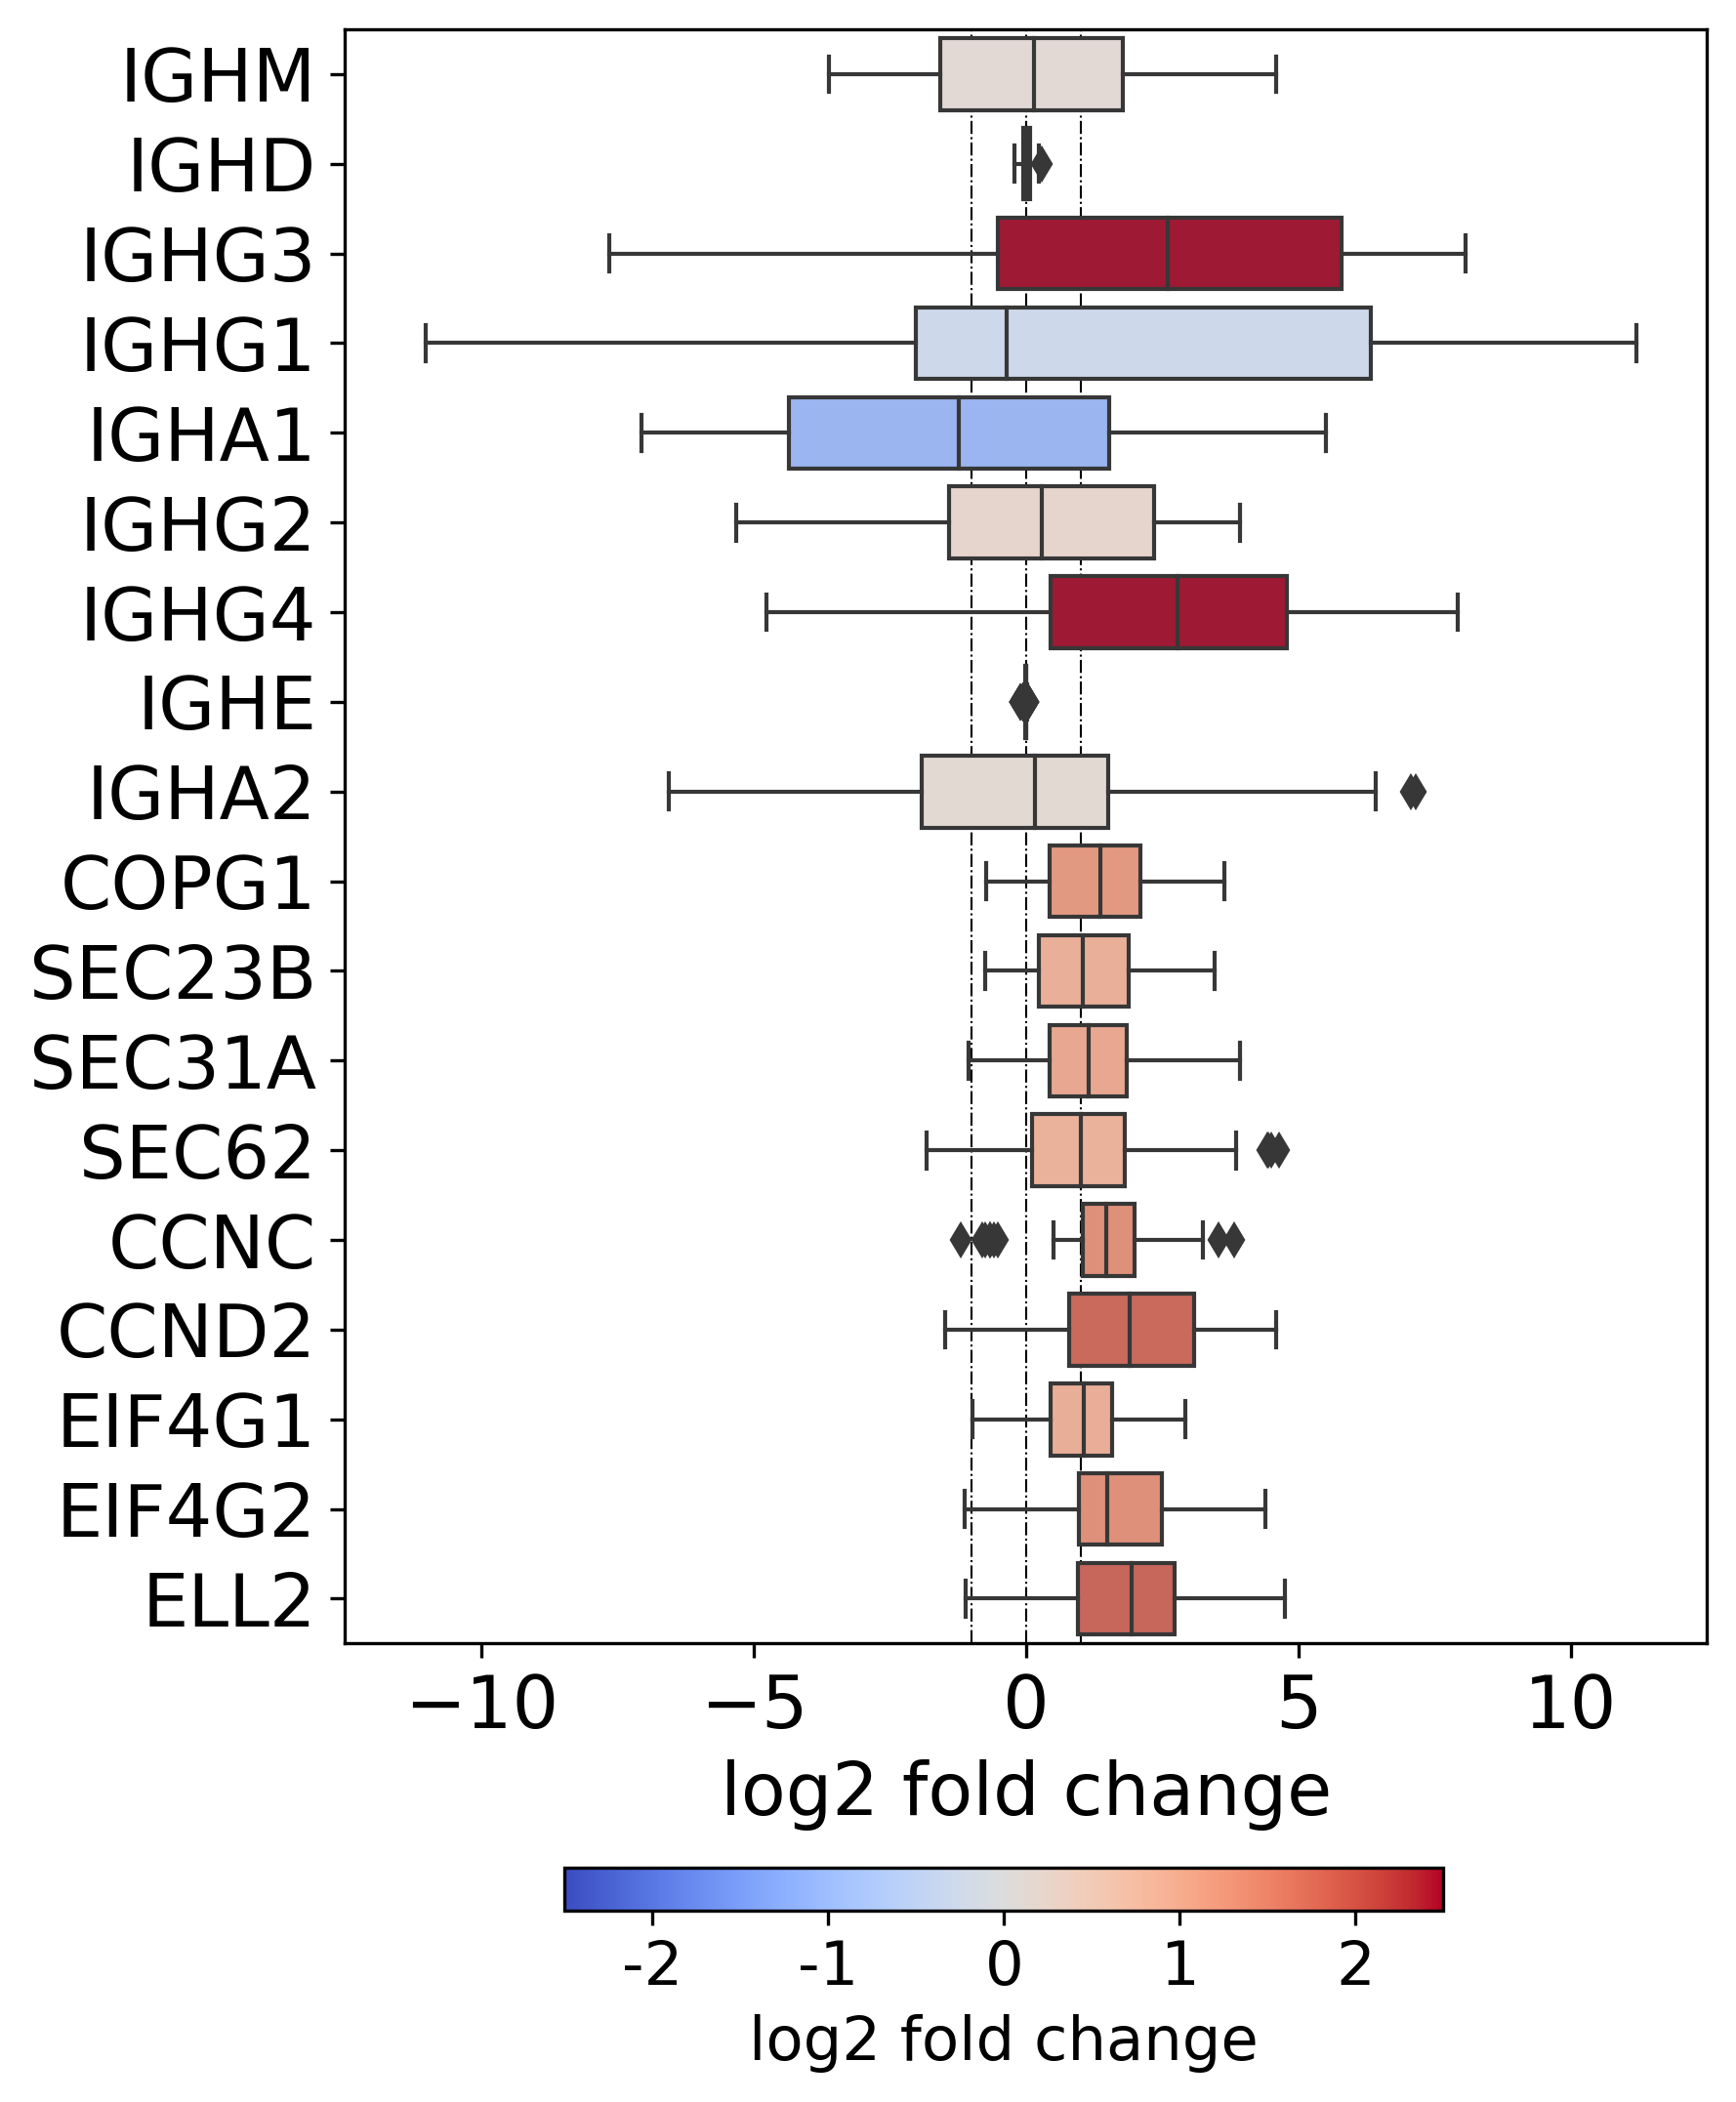

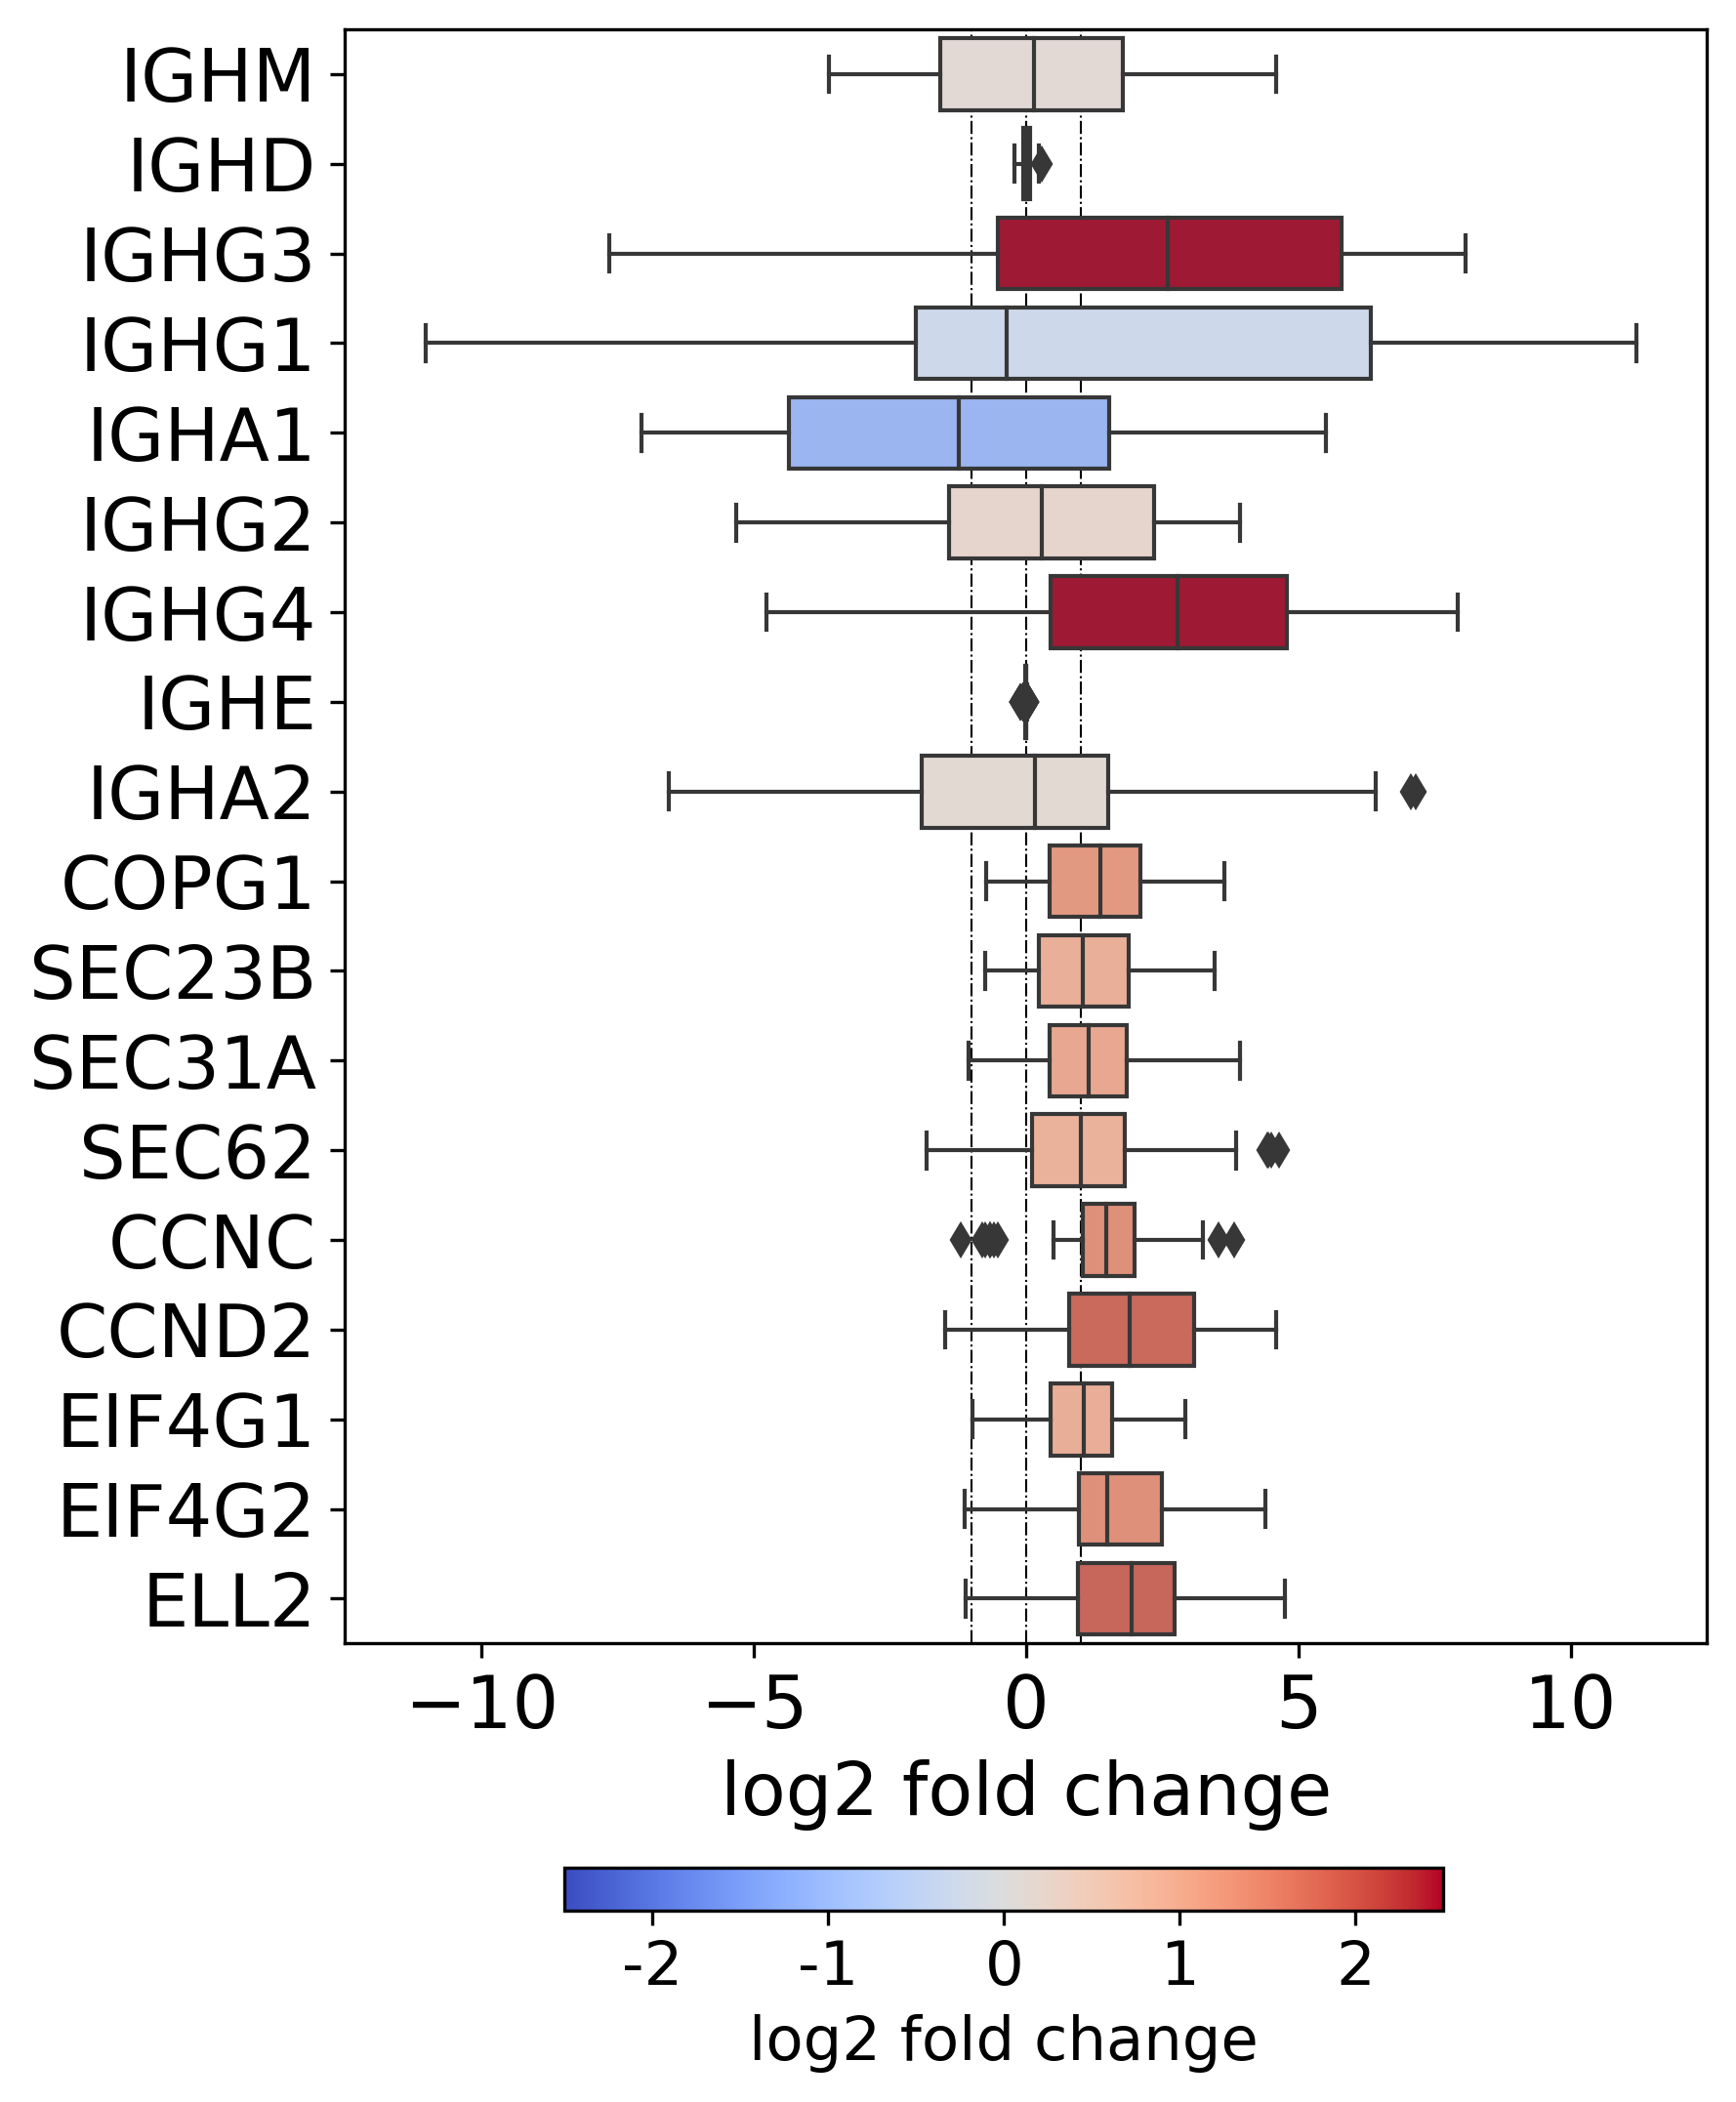

In [48]:
 child_genes =  [
          'IGHM', 'IGHD', 'IGHG3', 'IGHG1', 'IGHA1', 'IGHG2', 'IGHG4', 'IGHE', 'IGHA2', 
             'COPG1', 'SEC23B', 'SEC31A', 'SEC62', # 'COPA', 'COPB1', #'SEC63',
             'CCNC', 'CCND2',
        'EIF4G1', 'EIF4G2', 'ELL2', #'EIF4E',

               ]
pairwise_boxplot(ct_log2FC, ['Plasmablasts'], child_genes, path='Plasma_child.pdf', xlim=12.5)
pairwise_boxplot(ct_log2FC, ['Plasmablasts'], child_genes, path='Plasma_child.png', xlim=12.5)

{'figure': <Figure size 1800x2190 with 2 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdbe8e94e50>}

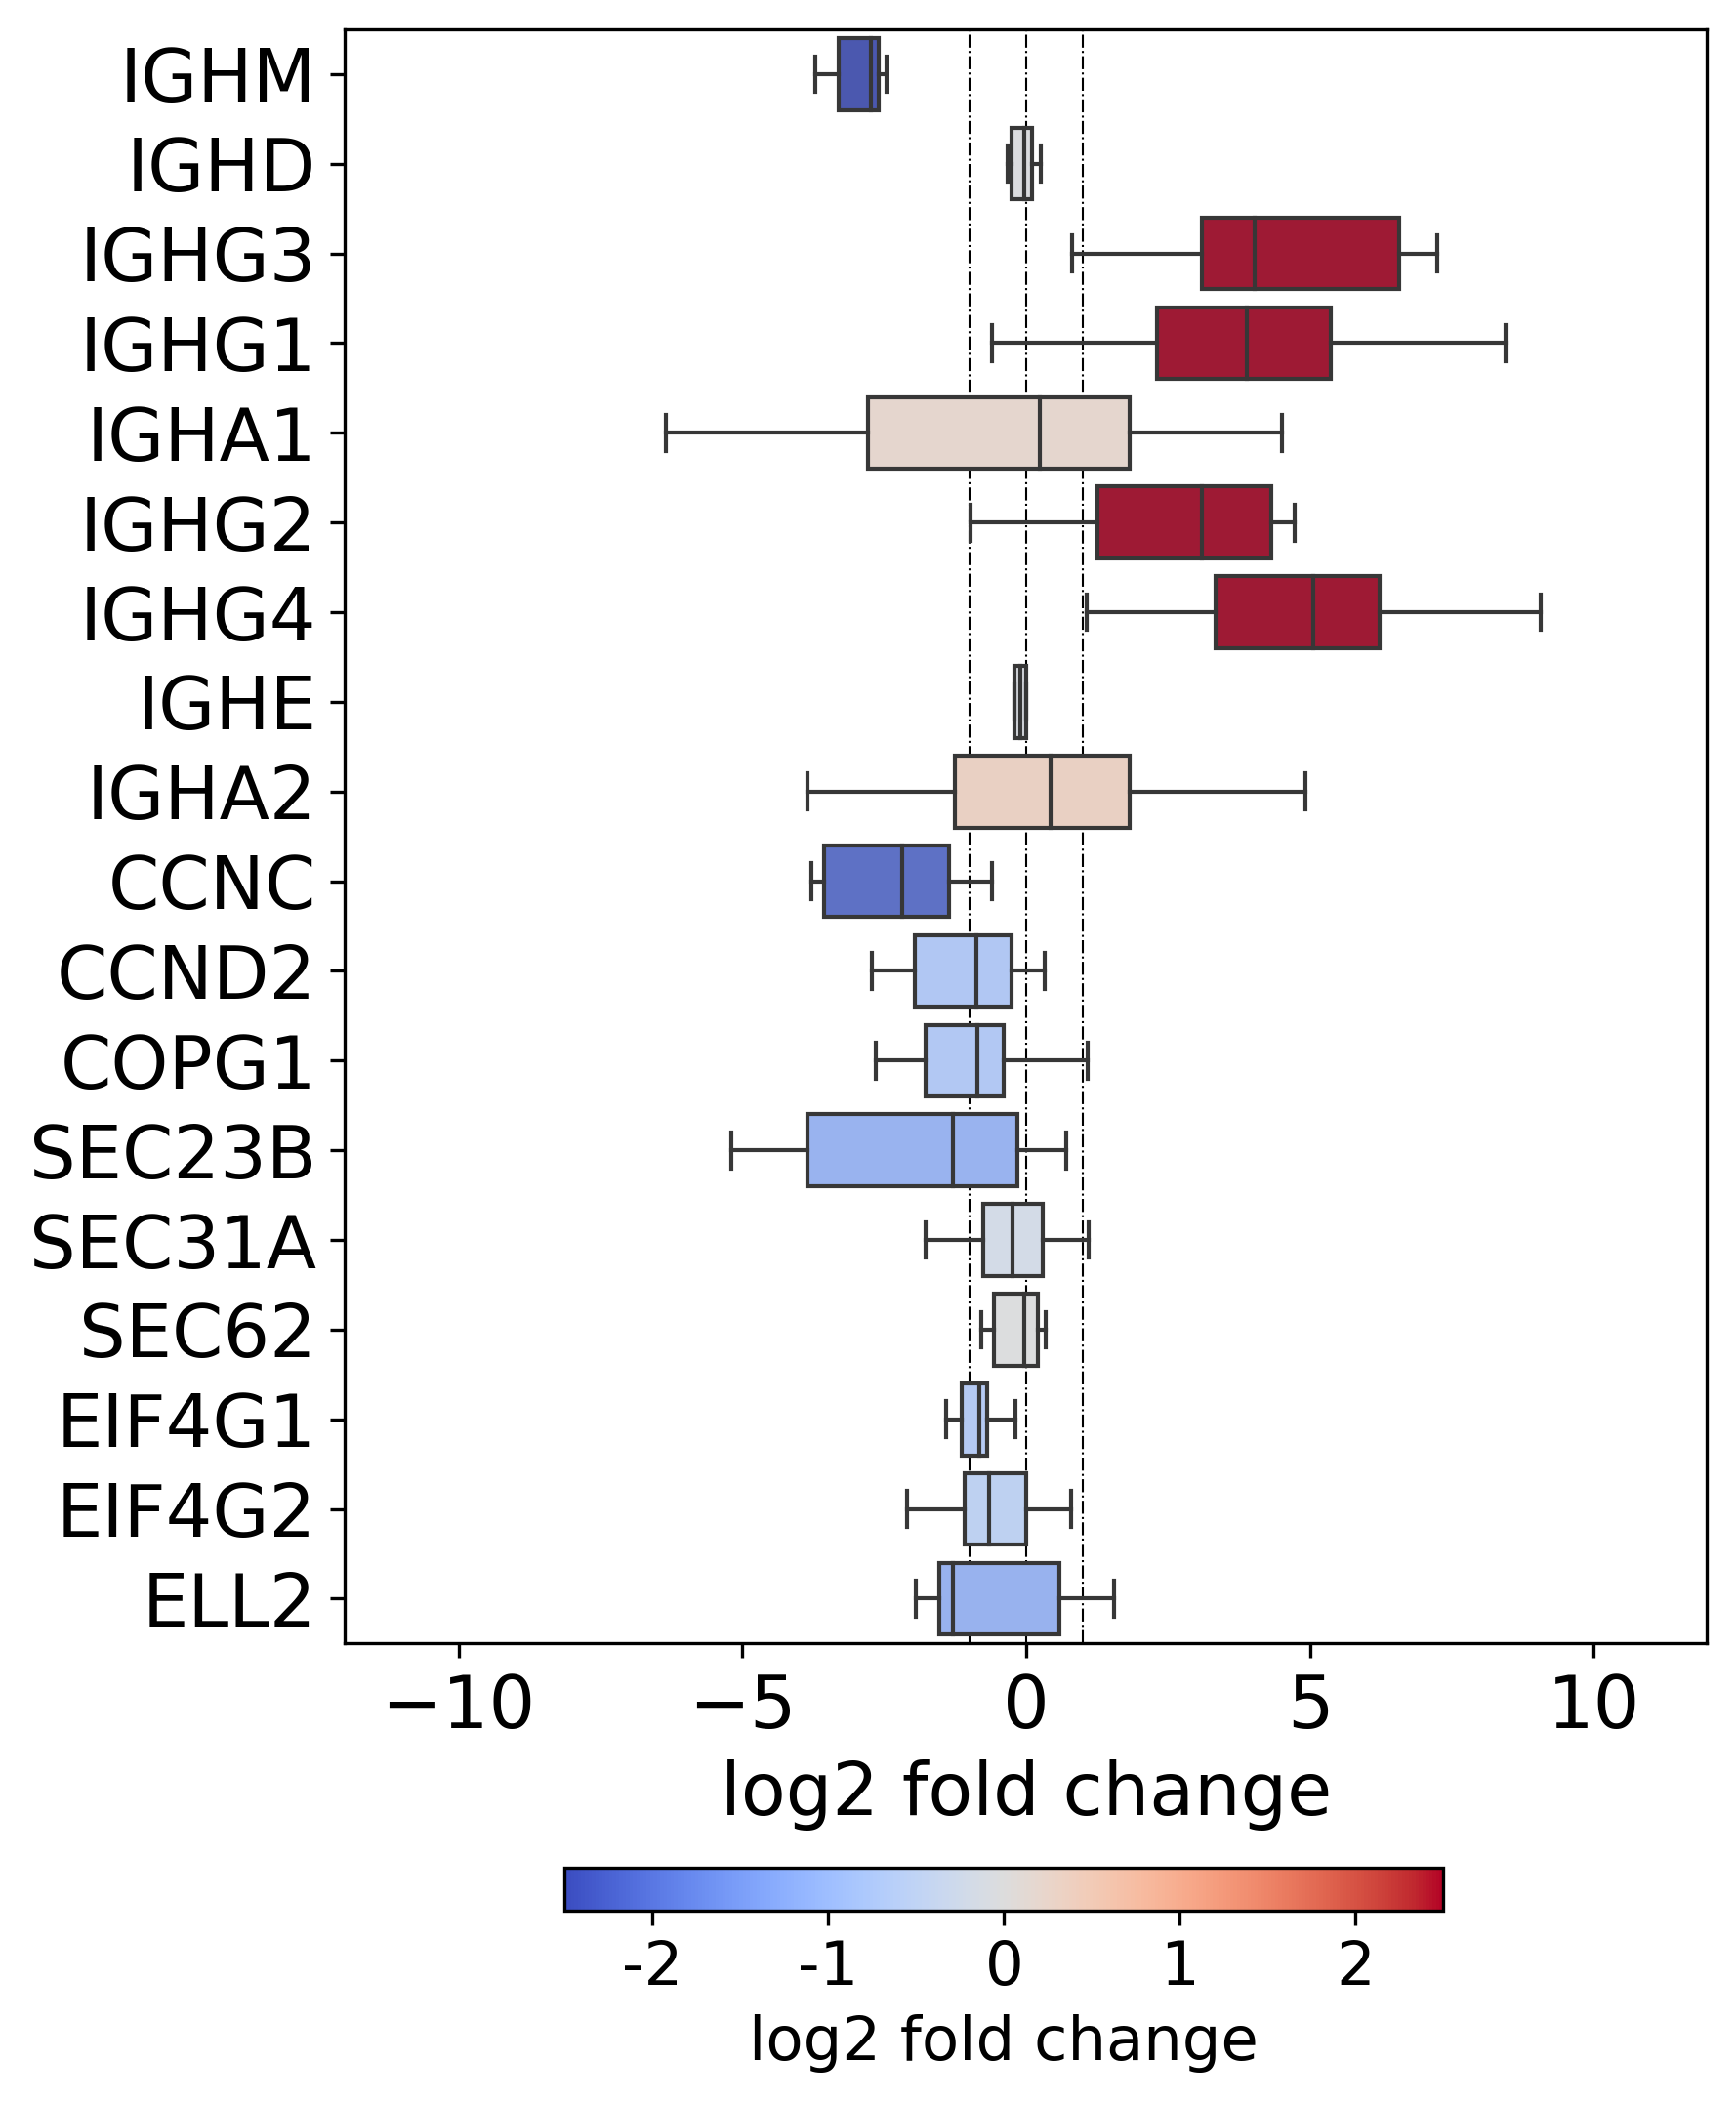

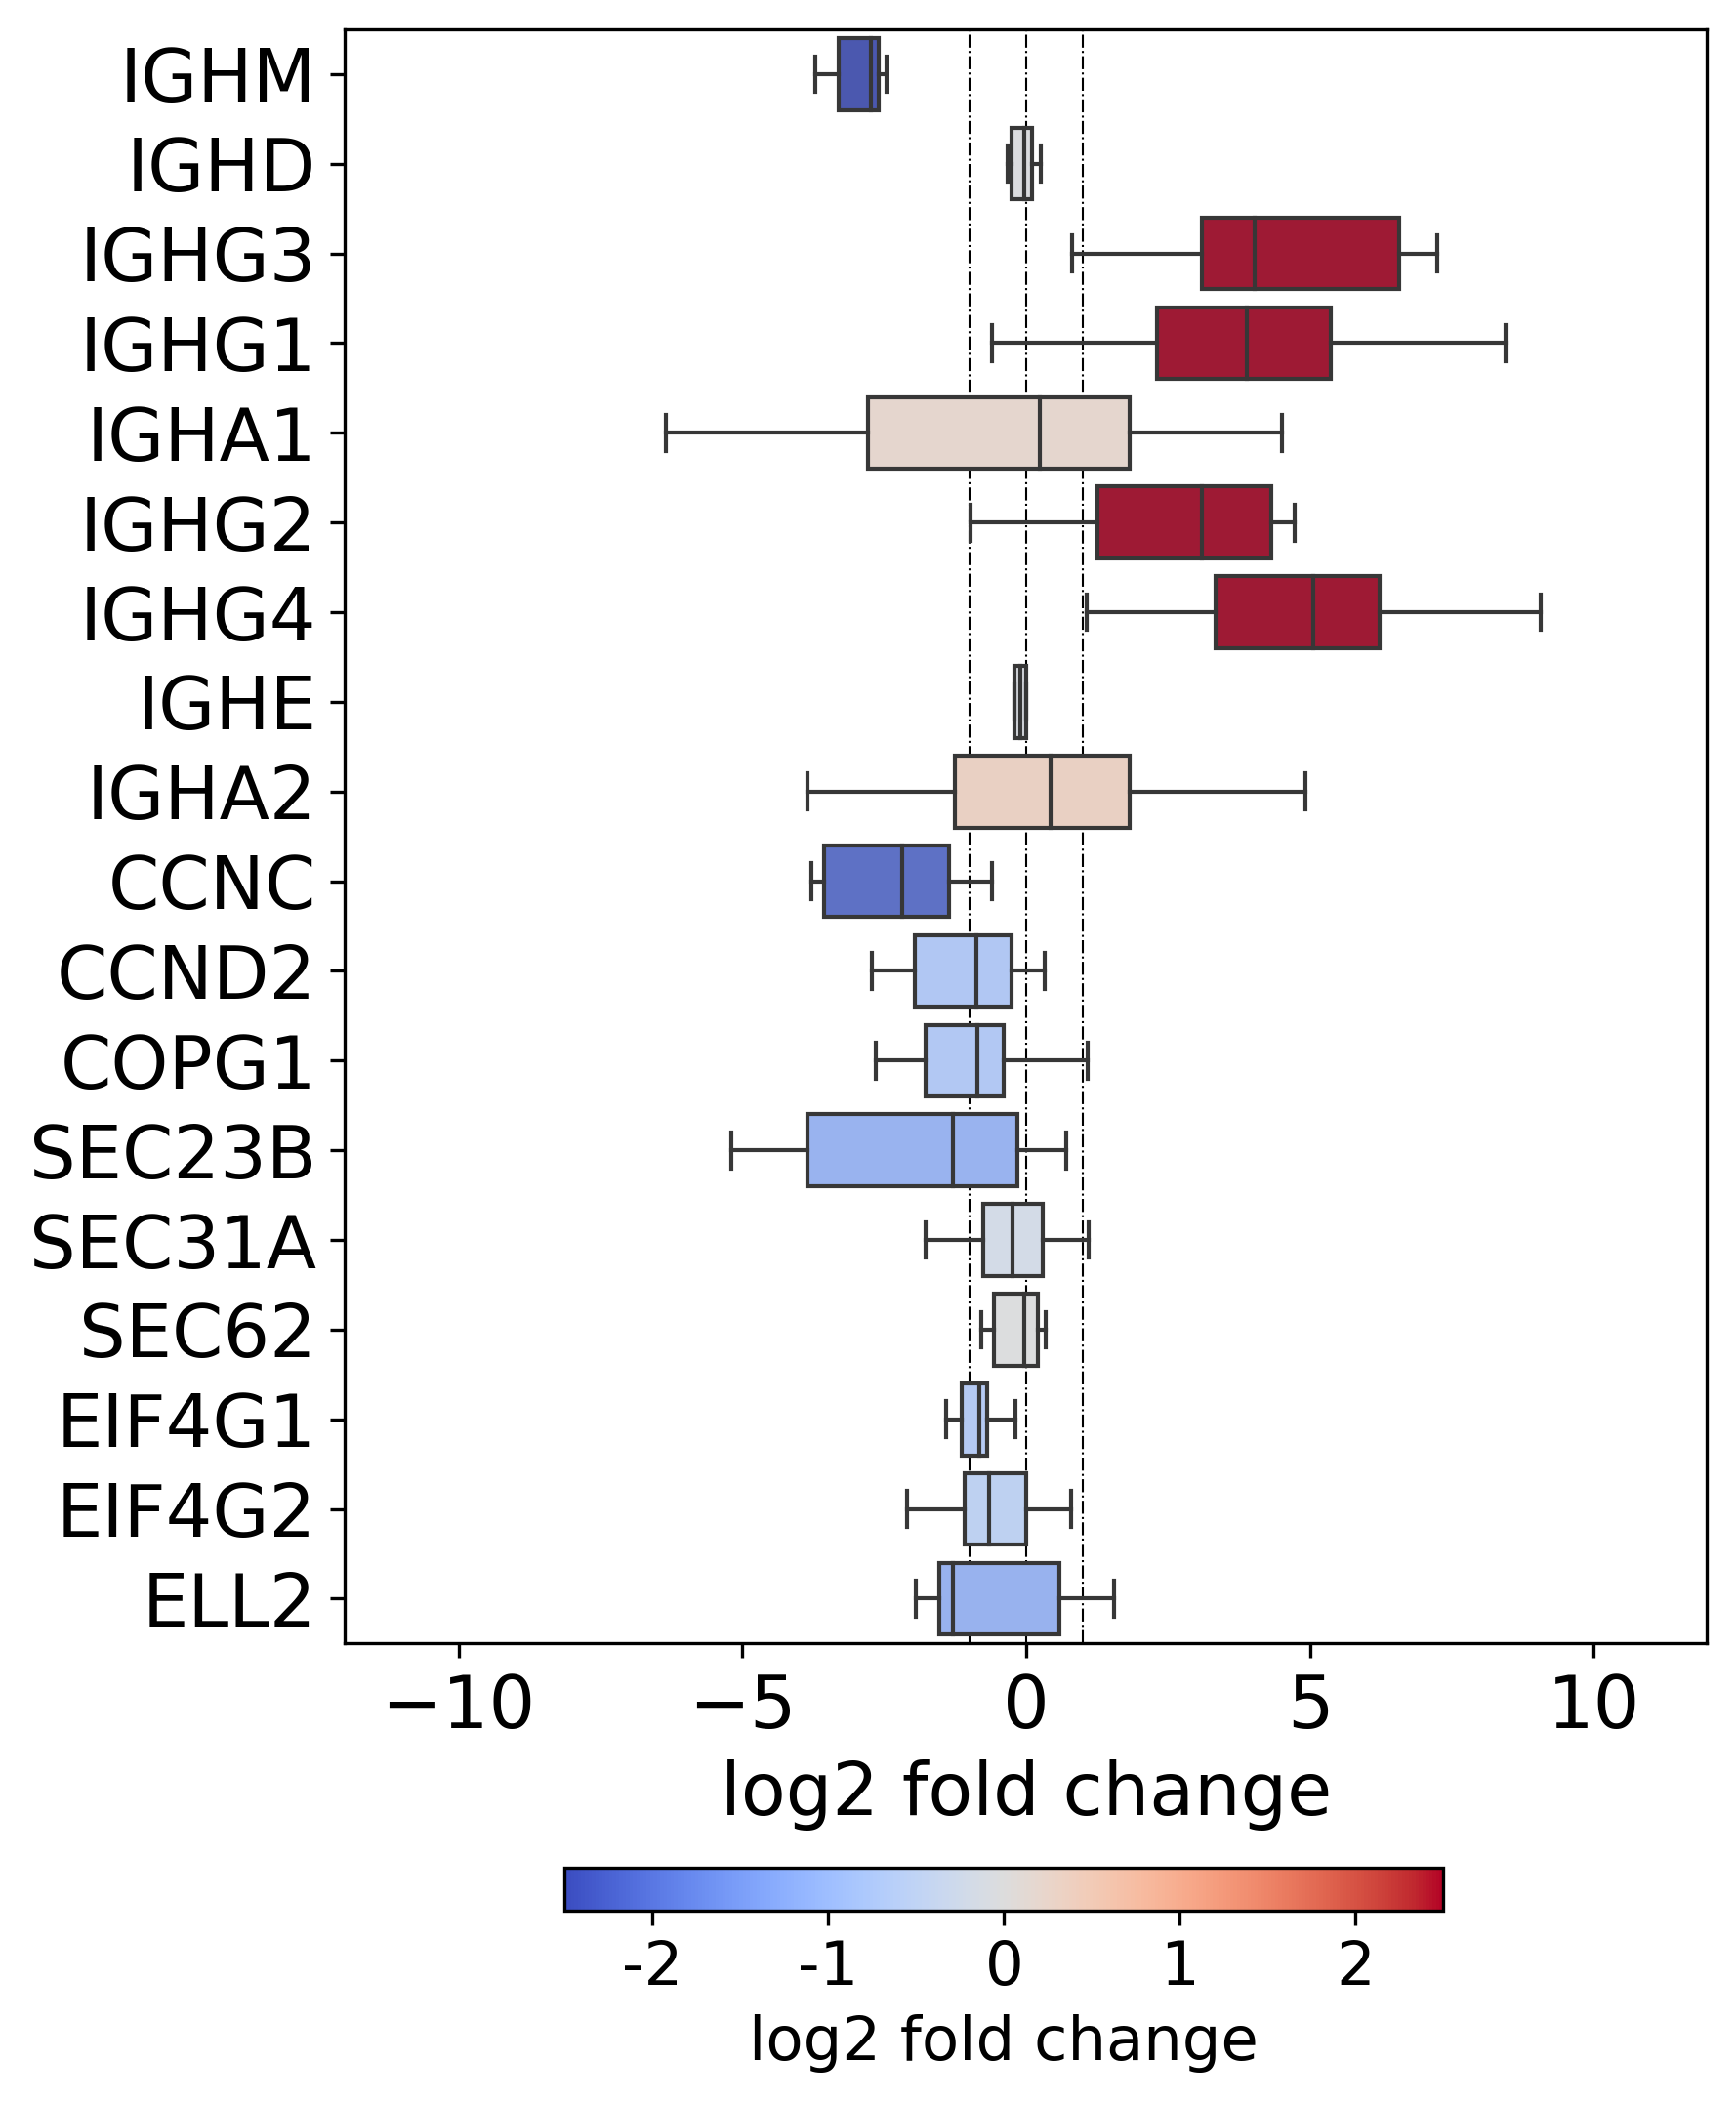

In [49]:
adult_genes =  [
          'IGHM', 'IGHD', 'IGHG3', 'IGHG1', 'IGHA1', 'IGHG2', 'IGHG4', 'IGHE', 'IGHA2',
            'CCNC', 'CCND2',
             'COPG1', 'SEC23B', 'SEC31A', 'SEC62', # 'COPA', 'COPB1', #'SEC63',
        'EIF4G1', 'EIF4G2', 'ELL2', #'EIF4E',
     

               ]
pairwise_boxplot(ct_log2FC_a, ['Plasmablasts'], adult_genes, path='Plasma_adult.pdf')
pairwise_boxplot(ct_log2FC_a, ['Plasmablasts'], adult_genes, path='Plasma_adult.png')

In [33]:
temp = adata_kid[(adata_kid.obs['ID'] != '1_075_01') & (adata_kid.obs['ID'] != '6_029_01')]

In [36]:
temp[temp.obs['Condition'] == 'dengue'].obs['cell_type_new'].value_counts()

NK cells            9356
B cells             7528
Plasmablasts        5436
T cells             5204
Monocytes           1684
plasmacytoid DCs     229
conventional DCs     153
megakaryocytes        56
Name: cell_type_new, dtype: int64

In [32]:
adata_adult[adata_adult.obs['Condition'] == 'S_dengue'].obs['cell_type_new'].value_counts()

Monocytes       1284
B cells          788
T cells          608
NK cells         550
NK_unknown       235
Platelets        216
pDCs             138
Plasmablasts     113
cDCs               8
Name: cell_type_new, dtype: int64